## Importing & Pre Processing

In [1]:
# 0) Imports + style
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# point Python at the ./code folder
project = Path.cwd()
sys.path.insert(0, str(project / "code"))

CSV_ROOT = Path("input/experimental_input")

# outPath = Path("output-5.02-combined")
outPath = Path("output-8.16-combined")
outPath.mkdir(exist_ok=True, parents=True)

from combine_module import (
    Combiner, Y_WINDOWS_3, PT_BINS_2P5,
    COMP_COLORS, STATE_COLORS, PRETTY_STATE, BAND_ALPHA
)

from compare_helpers import (
    compare_total_vs_y_per_centrality,
    compare_total_vs_y_integrated,
    compare_total_vs_pt_integrated,
    compare_double_ratio_vs_pt,
    cent_centers,               
)

In [2]:
# Paths 5 TeV pPb
ELOSS_5TEV = "./input/eloss/pPb5TeV"
NPDF_5TEV  = "./input/npdf/pPb5TeV/"
PRIM_BASE_5TEV_NPWLC = "./input/primordial/pPb5TeV/output_5pPb_Tf170_NPWLC"
PRIM_BASE_5TEV_Pert = "./input/primordial/pPb5TeV/output_5pPb_Tf170_Pert"
GLAUBER_5TEV   = "./input/glauber_data/5TeV"
# Paths 8 TeV pPb
ELOSS_8TEV = "./input/eloss/pPb8TeV/output_8160GeV_pPb_alpha_constant"
NPDF_8TEV  = "./input/npdf/pPb8TeV"
PRIM_BASE_8TEV_NPWLC = "./input/primordial/pPb8TeV/output_8pPb_Tf170_NPWLC"
PRIM_BASE_8TEV_Pert = "./input/primordial/pPb8TeV/output_8pPb_Tf170_Pert"
GLAUBER_8TEV   = "./input/glauber_data/8TeV"

# C5NPWLC = Combiner(
#     tag="5.02",
#     e_loss_base=ELOSS_5TEV,
#     npdf_folder=NPDF_5TEV,
#     prim_base=PRIM_BASE_5TEV_NPWLC,
#     glauber_root=GLAUBER_5TEV,
#     sigmaNN_mb=67.0,
#     sqrt_sNN_GeV=5020.0,
# )

# C5Pert = Combiner(
#     tag="5.02",
#     e_loss_base=ELOSS_5TEV,
#     npdf_folder=NPDF_5TEV,
#     prim_base=PRIM_BASE_5TEV_Pert,
#     glauber_root=GLAUBER_5TEV,
#     sigmaNN_mb=67.0,
#     sqrt_sNN_GeV=5020.0,
# )

C8NPWLC = Combiner(
    tag="8.16",
    e_loss_base=ELOSS_8TEV,
    npdf_folder=NPDF_8TEV,
    prim_base=PRIM_BASE_8TEV_NPWLC,
    glauber_root=GLAUBER_8TEV,
    sigmaNN_mb=71.0,
    sqrt_sNN_GeV=8160.0,
)
C8Pert = Combiner(
    tag="8.16",
    e_loss_base=ELOSS_8TEV,
    npdf_folder=NPDF_8TEV,
    prim_base=PRIM_BASE_8TEV_Pert,
    glauber_root=GLAUBER_8TEV,
    sigmaNN_mb=71.0,
    sqrt_sNN_GeV=8160.0,
)

[INFO] Loaded 0-10
[INFO] Loaded 10-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-80
[INFO] Loaded 80-100
[INFO] Loaded 0-10
[INFO] Loaded 10-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-80
[INFO] Loaded 80-100
[INFO] Loaded 0-10
[INFO] Loaded 10-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-80
[INFO] Loaded 80-100
[INFO] Loaded 0-10
[INFO] Loaded 10-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-80
[INFO] Loaded 80-100


In [3]:
MODELS = {
    "NPWLC": C8NPWLC,   # as you constructed above
    "Pert":  C8Pert,
}
# MODELS = {
#     "NPWLC": C5NPWLC,   # as you constructed above
#     "Pert":  C5Pert,
# }
MODEL_STYLES = {
    "NPWLC": dict(color="#8a9cff", band_alpha=0.25, ls="-",  z=3, marker="o"),
    "Pert":  dict(color="#8a9cff", band_alpha=0.25, ls="--", z=2, marker="s", hatch="///"),
}


In [4]:
# ----------------------------- constants -----------------------------
CENT_EDGES_ELOSS = [0, 10, 20, 40, 60, 80, 100]                       # match eLoss bins
Y_WINDOWS_3      = [(-1.93, 1.93), (1.5, 4.0), (-5.0, -2.5)]  # mid, fwd, bwd
PT_BINS_2P5      = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]

In [5]:
# you can override here as well:
STATE_COLORS.update({
    "jpsi_1S":  "#8c564b",
    "psi_2S":   "#e377c2",
    "chicJ_1P": "#17becf",
})

## Experimental Centrality Data

In [6]:
## EXPERIMENTAL PLOTS (CENTRALITY DEPENDENT ONLY)
from hep_cent_data_reader import HEPCentDataReader, plot_series, plot_pt_panels

reader = HEPCentDataReader(Path.cwd() / "input" / "experimental_input")

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


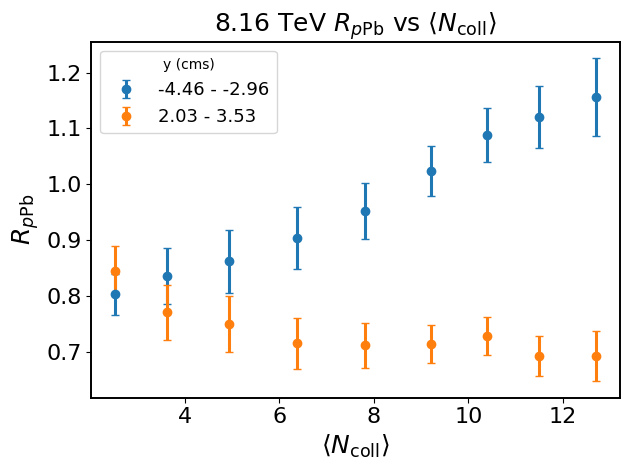

In [7]:
df8N = reader.rpa_vs_ncoll("8TeV")
fig, ax = plt.subplots()
for yr, g in df8N.groupby("rapidity"):
    plot_series(ax, g, x="ncoll", label=yr, fmt="o",
                yerr_mode="stat_plus_uncorr", show_xerr=False)
ax.set_xlabel(r"$\langle N_{\mathrm{coll}}\rangle$")
ax.set_ylabel(r"$R_{p\mathrm{Pb}}$")
ax.set_title(r"8.16 TeV $R_{p\mathrm{Pb}}$ vs $\langle N_{\mathrm{coll}}\rangle$")
ax.legend(title="y (cms)")
plt.show()

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


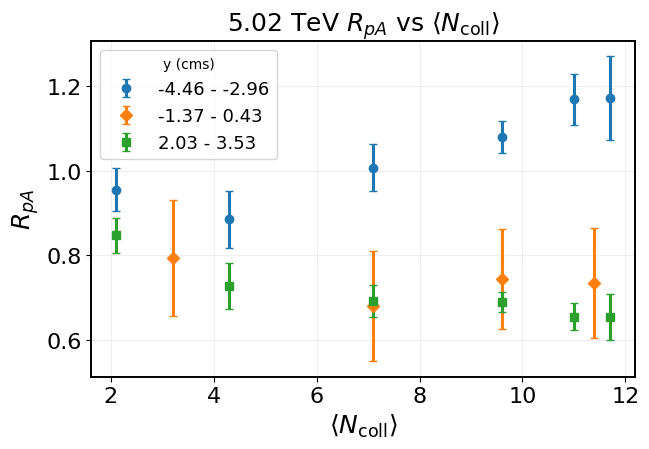

In [8]:
df5N = reader.rpa_vs_ncoll("5TeV")
# Plot all three rapidity windows (backward, mid, forward)
order = ["-4.46 - -2.96", "-1.37 - 0.43", "2.03 - 3.53"]
markers = {"-4.46 - -2.96": "o", "-1.37 - 0.43": "D", "2.03 - 3.53": "s"}

fig, ax = plt.subplots(figsize=(6.6,4.6))
for yr in order:
    g = df5N[df5N["rapidity"]==yr]
    if g.empty: continue
    plot_series(ax, g, x="ncoll", label=yr, fmt=markers.get(yr,"o"),
                yerr_mode="stat_plus_uncorr", show_xerr=False)

ax.set_xlabel(r"$\langle N_{\mathrm{coll}}\rangle$")
ax.set_ylabel(r"$R_{pA}$")
ax.set_title(r"5.02 TeV $R_{pA}$ vs $\langle N_{\mathrm{coll}}\rangle$")
ax.legend(title="y (cms)")
ax.grid(alpha=0.2)
plt.show()

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


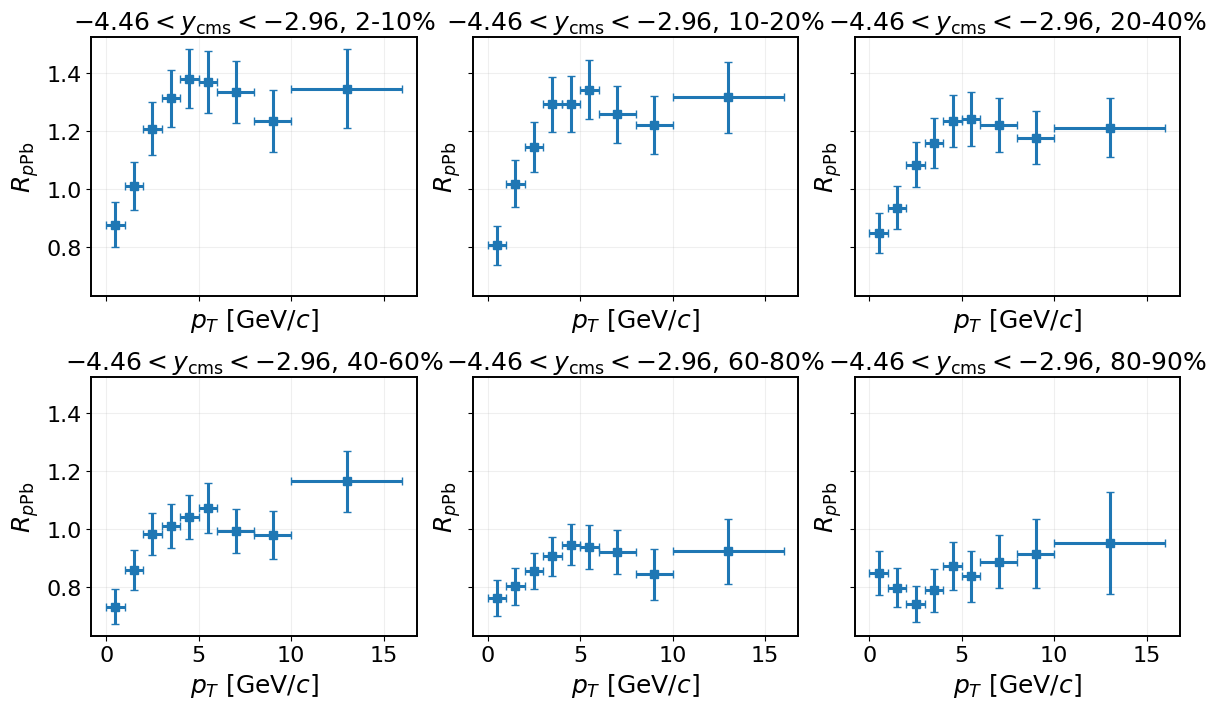

In [9]:
# ---------- RpA/RpPb vs pT: panel subfigures per centrality (auto-detected) ----------
# 8 TeV backward (Fig. 7 style)
gs = reader.rpa_vs_pt("8TeV", rapidity="-4.46 - -2.96")
plot_pt_panels(gs, energy_label=r"$R_{p\mathrm{Pb}}$", y_label=r"$-4.46<y_{\rm cms}<-2.96$")
plt.show()

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


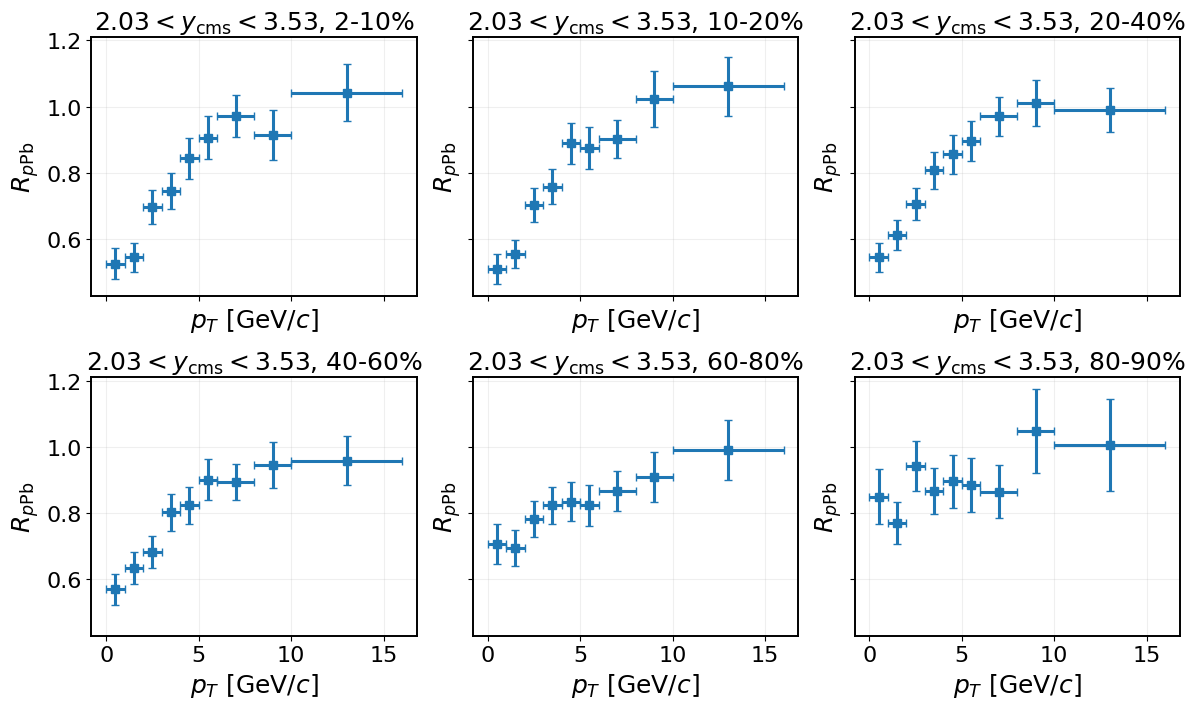

In [10]:
# 8 TeV forward (Fig. 8 style)
gs = reader.rpa_vs_pt("8TeV", rapidity="2.03 - 3.53")
plot_pt_panels(gs, energy_label=r"$R_{p\mathrm{Pb}}$", y_label=r"$2.03<y_{\rm cms}<3.53$")
plt.show()

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


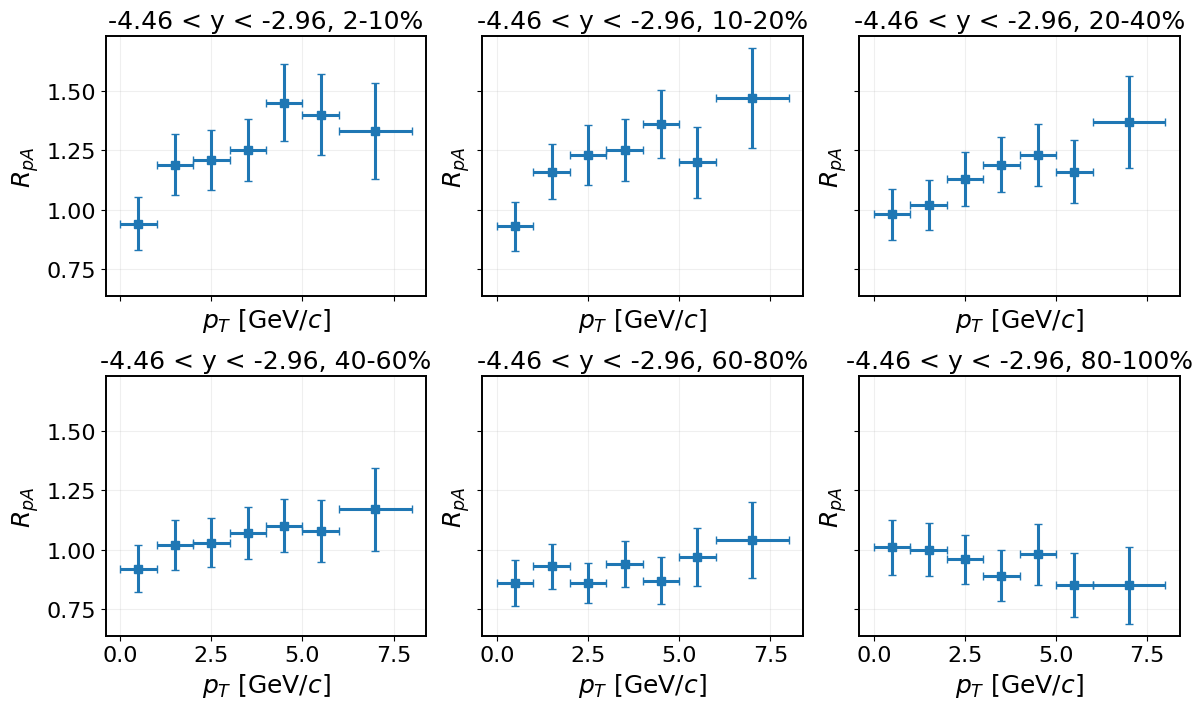

In [11]:
# 5 TeV backward & forward panels (match your earlier working case)
gs = reader.rpa_vs_pt("5TeV", rapidity="-4.46 - -2.96")
plot_pt_panels(gs, energy_label=r"$R_{pA}$", y_label="-4.46 < y < -2.96")
plt.show()

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


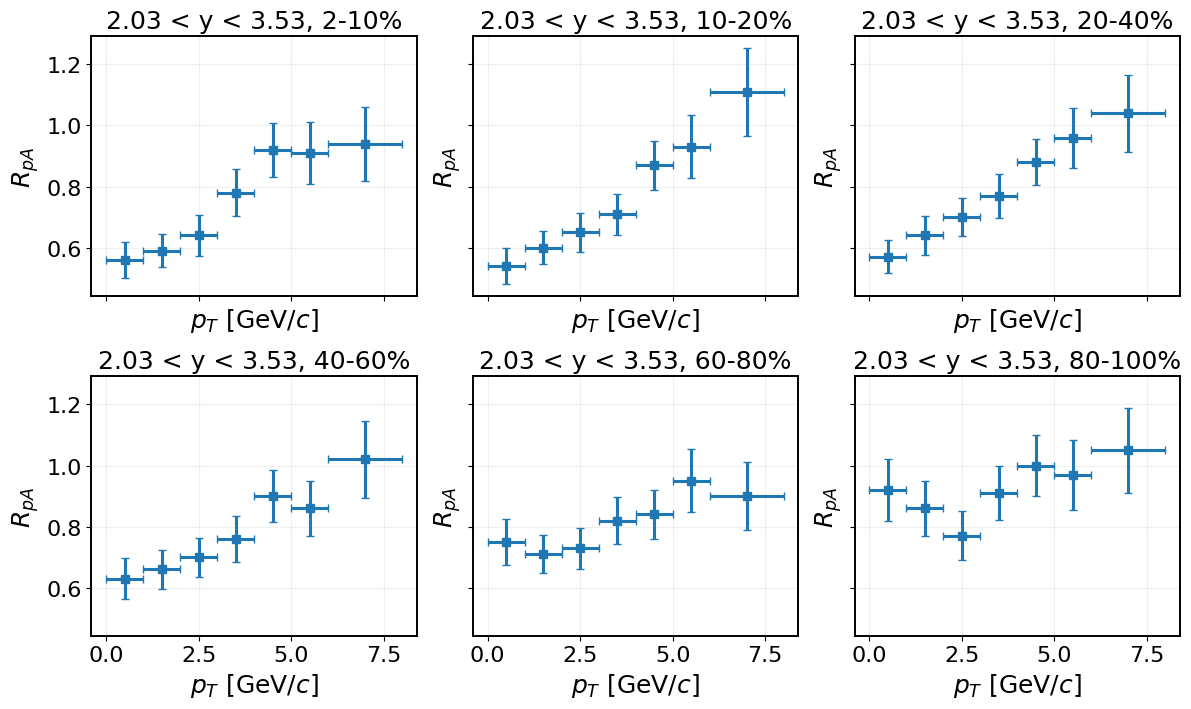

In [12]:
# 5 TeV forward panels (match your earlier working case)
gs = reader.rpa_vs_pt("5TeV", rapidity="2.03 - 3.53")
plot_pt_panels(gs, energy_label=r"$R_{pA}$", y_label="2.03 < y < 3.53")
plt.show()

In [13]:
# pT-averaged RpA vs y (two points per centrality: backward & forward)
rpa_vs_y_8 = reader.rpa_vs_y_from_pt("8TeV", how="width", pt_min=0.0, pt_max=16.0)
rpa_vs_y_5 = reader.rpa_vs_y_from_pt("5TeV", how="width", pt_min=0.0, pt_max=16.0)

# print(rpa_vs_y_8)  # now y_cen = -3.71 for backward, +2.78 for forward
# print(rpa_vs_y_5)

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)
/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:319: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_agg)
/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of Data

(<Figure size 1200x640 with 6 Axes>,
 array([<Axes: title={'center': '2-10%'}, xlabel='$y_{\\rm cms}$', ylabel='$\\langle R_{pA}\\rangle_{p_T}$'>,
        <Axes: title={'center': '10-20%'}, xlabel='$y_{\\rm cms}$'>,
        <Axes: title={'center': '20-40%'}, xlabel='$y_{\\rm cms}$'>,
        <Axes: title={'center': '40-60%'}, xlabel='$y_{\\rm cms}$'>,
        <Axes: title={'center': '60-80%'}, xlabel='$y_{\\rm cms}$'>,
        <Axes: title={'center': '80-90%'}, xlabel='$y_{\\rm cms}$'>],
       dtype=object))

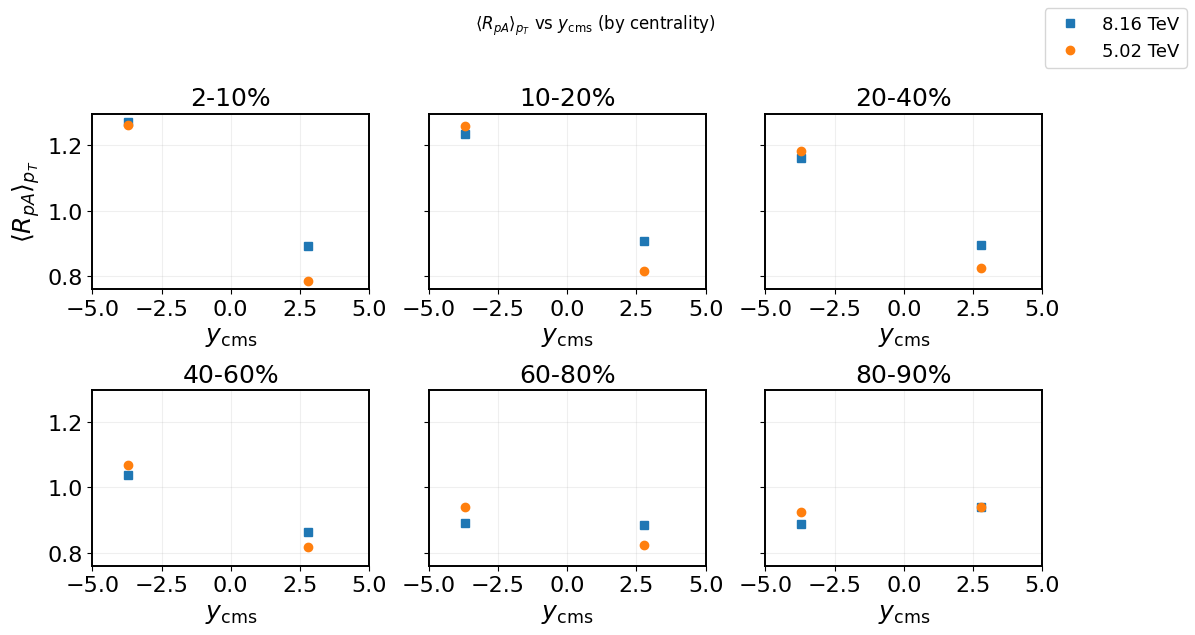

In [14]:
from hep_cent_data_reader import plot_y_panels
# one multi-panel figure: each panel = one centrality bin
# (5 TeV 80–100% points overlay in the 80–90% panel automatically)
plot_y_panels(rpa_vs_y_5, rpa_vs_y_8,
              title=r"$\langle R_{pA}\rangle_{p_T}$ vs $y_{\rm cms}$ (by centrality)",
              merge_80100_into_8090=True)   # overlays 80–100% with 80–90%

## $R_{pA}$ vs Centrality

In [15]:
## RpA vs CEntrality (Theory and later add Experimental)
YW_ALL   = [(-5,5)]            
PT_RANGE = (0.0, 20.0)

In [16]:
from compare_helpers import compare_vs_centrality_by_state

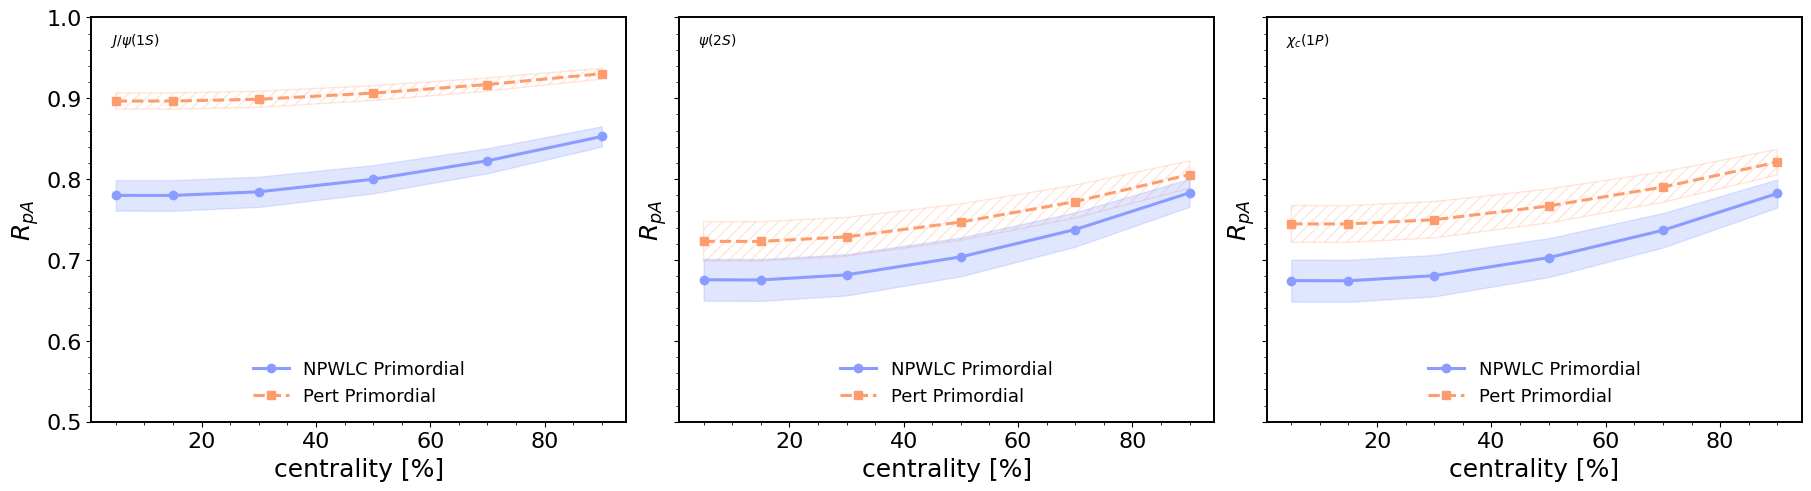

In [17]:
compare_vs_centrality_by_state(
    MODELS, y_window=(-5,5), pt_range=(0,20),
    states=["jpsi_1S","psi_2S","chicJ_1P"],
    what="Primordial", show_cnm=False, ylim=(0.5,1.0),
    save_pdf=f"{outPath}/cmp_Primordial_vs_centrality.pdf"
)

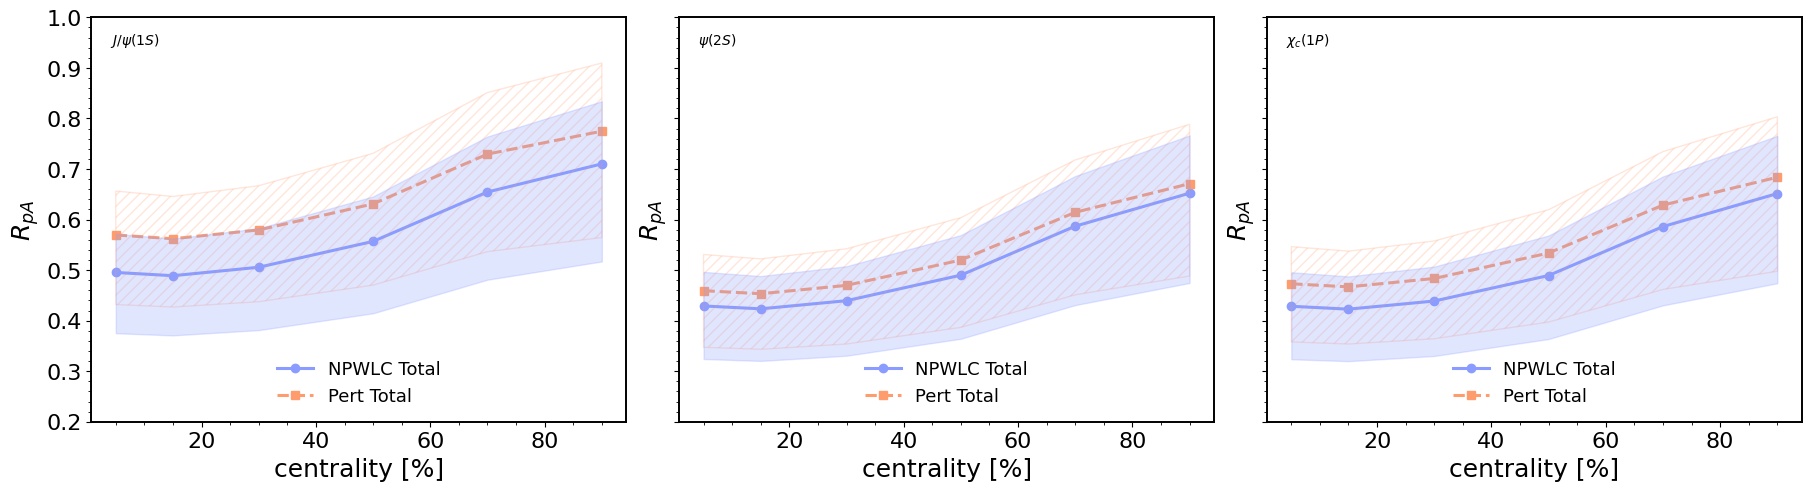

In [18]:
# Total overlays (with CNM band or errorbars)
compare_vs_centrality_by_state(
    MODELS, y_window=(-5,5), pt_range=(0,20),
    states=["jpsi_1S","psi_2S","chicJ_1P"],
    what="Total", show_cnm=True, cnm_as="band", ylim=(0.2,1.0),
    save_pdf=f"{outPath}/cmp_Total_vs_centrality.pdf"
)

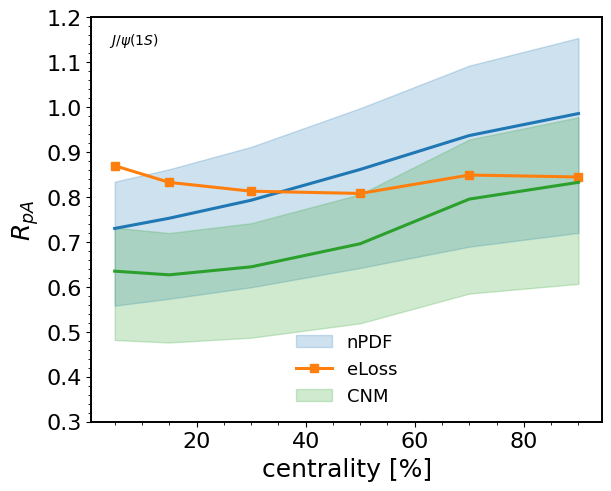

In [19]:
# Total overlays (with CNM band or errorbars)
compare_vs_centrality_by_state(
    MODELS, y_window=(-5,5), pt_range=(0,20),
    states=["jpsi_1S"],
    what=["nPDF","eLoss", "CNM"], show_cnm=True, cnm_as="band", ylim=(0.3,1.2),
    save_pdf=f"{outPath}/cnm_vs_centrality.pdf"
)

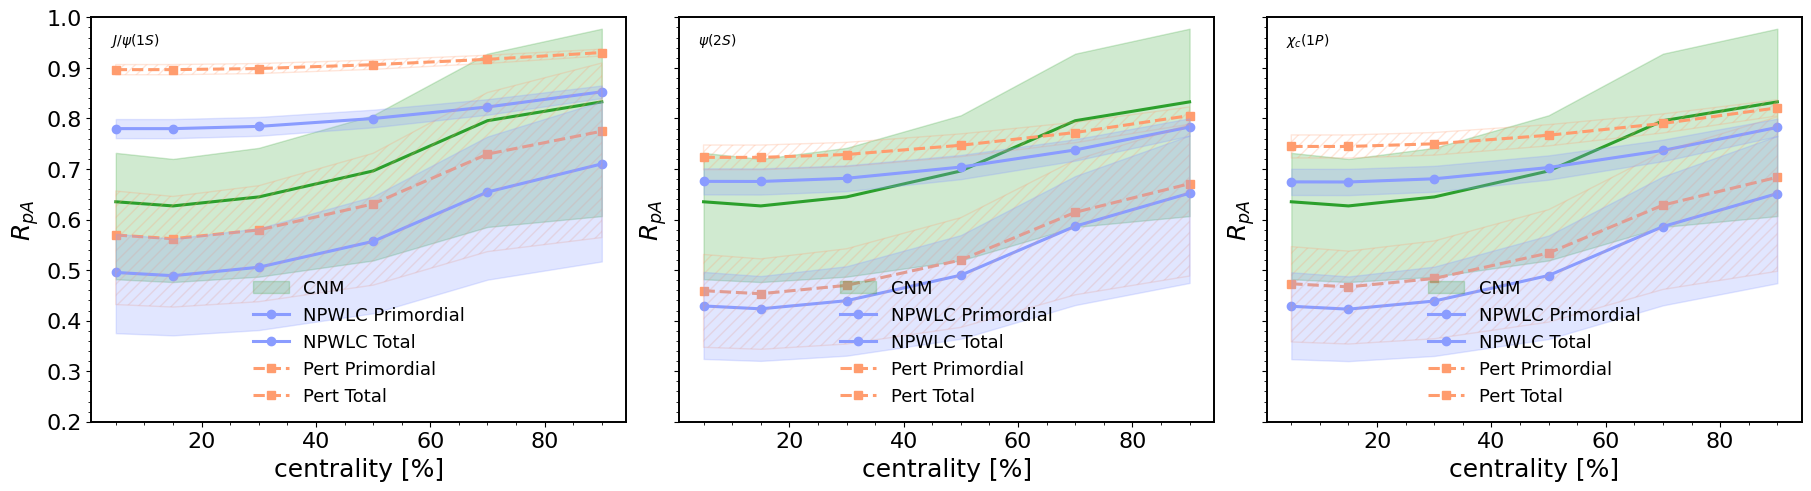

In [20]:
# Total overlays (with CNM band or errorbars)
compare_vs_centrality_by_state(
    MODELS, y_window=(-5,5), pt_range=(0,20),
    states=["jpsi_1S","psi_2S","chicJ_1P"],
    what=["Primordial", "CNM","Total"], show_cnm=True, cnm_as="band", ylim=(0.2,1.0),
    save_pdf=f"{outPath}/All_vs_centrality.pdf"
)

In [21]:
from compare_helpers import compare_total_vs_Ncoll

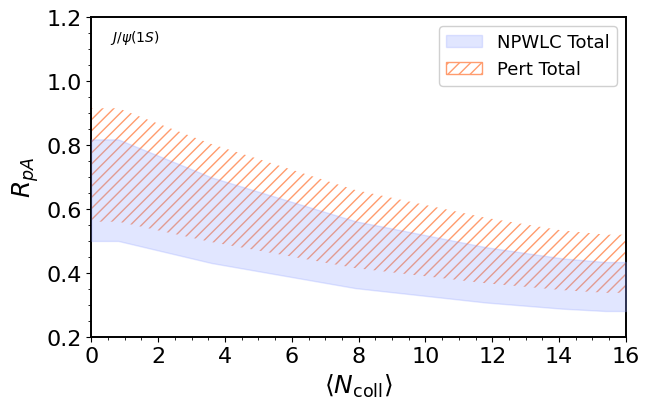

In [22]:
compare_total_vs_Ncoll(
    MODELS,
    y_window=(-1.93, 1.93), pt_range=(0.0, 20.0), state="jpsi_1S",
    what=["Total"], xlim=(0,16), span_full_x=True, draw_central=False,
    legend_title=None,
    save_pdf=f"{outPath}/cmp_Total_vs_Ncoll_Jpsi1S_mid_8TeV_bands.pdf"
)

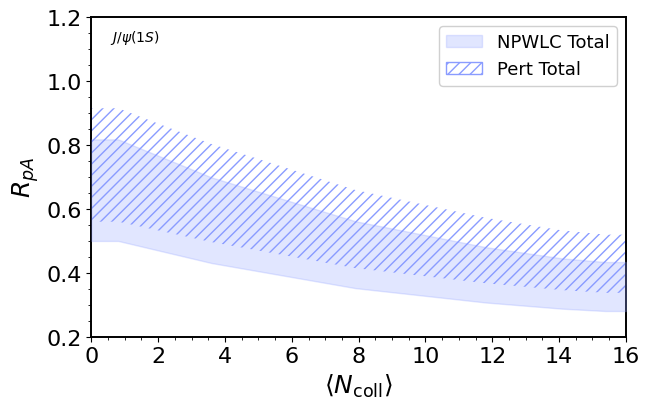

In [23]:
# --- RpA vs N_coll (NEW; CNM and Total)
compare_total_vs_Ncoll(
    MODELS,
    y_window=(-1.93, 1.93),
    pt_range=(0.0, 20.0),
    state="jpsi_1S",
    model_styles=MODEL_STYLES,
    ylim=(0.2, 1.2),
    xlim=(0, 16),                  # optional, makes axis exact
    span_full_x=True,              # extend band to the xlim edges
    save_pdf=f"{outPath}/cmp_Total_vs_Ncoll_Jpsi1S_mid_8TeV_bands.pdf"
)

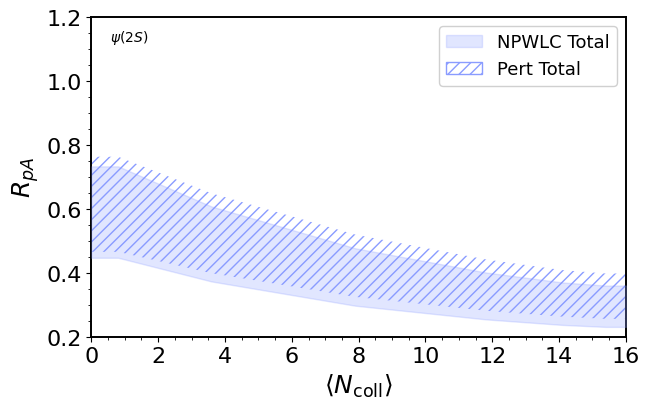

In [24]:
# --- RpA vs N_coll (NEW; CNM and Total)
compare_total_vs_Ncoll(
    MODELS,
    y_window=(-1.93, 1.93),
    pt_range=(0.0, 20.0),
    state="psi_2S",
    model_styles=MODEL_STYLES,
    ylim=(0.2, 1.2),
    xlim=(0, 16),                  # optional, makes axis exact
    span_full_x=True,              # extend band to the xlim edges
    save_pdf=f"{outPath}/cmp_Total_vs_Ncoll_psi2S_mid_8TeV_bands.pdf"
)

      cent_bin  r_central      r_lo      r_hi     eloss  eloss_lo  eloss_hi  \
0    0.0-10.0%   0.927041  0.789209  1.051381  0.999287  0.900596  1.097978   
1   10.0-20.0%   0.933197  0.793133  1.059648  0.914482  0.848522  0.980442   
2   20.0-40.0%   0.944018  0.799924  1.074285  0.858256  0.816411  0.900101   
3   40.0-60.0%   0.962550  0.810111  1.100796  0.811683  0.796663  0.826703   
4   60.0-80.0%   0.982954  0.821327  1.129985  0.822865  0.816520  0.829210   
5  80.0-100.0%   0.996189  0.828602  1.148918  0.857342  0.848322  0.866362   

      cnm_c    cnm_lo    cnm_hi  
0  0.926380  0.761029  1.080681  
1  0.853392  0.711283  0.984391  
2  0.810209  0.680384  0.928785  
3  0.781286  0.656711  0.894425  
4  0.808838  0.675695  0.929985  
5  0.854075  0.710115  0.985324  


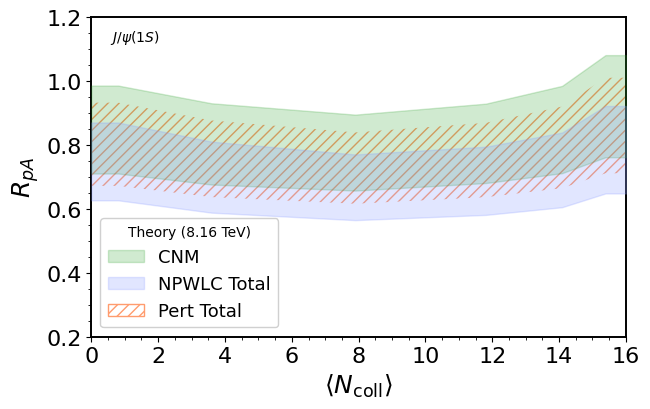

In [25]:
# theory bands first
compare_total_vs_Ncoll(
    MODELS,
    y_window=(-4.46, -2.93), pt_range=(0.0, 20.0), state="jpsi_1S",
    what=["CNM","Total"], xlim=(0,16), span_full_x=True, draw_central=False,
    legend_title="Theory (8.16 TeV)",
    save_pdf=f"{outPath}/cmp_Total_vs_Ncoll_Jpsi1S_mid_8TeV_bands.pdf"
)

In [26]:
import re
def _ycms_center_str(s: str) -> float:
    s = str(s).replace("−","-")
    nums = re.findall(r'[-+]?\d+(?:\.\d+)?', s)
    return 0.5*(float(nums[0]) + float(nums[1])) if len(nums) >= 2 else np.nan

def prep_exp_for_overlay(df: pd.DataFrame) -> pd.DataFrame:
    """Rename columns + build symmetric total err (stat ⊕ uncorrelated).
       IMPORTANT: reset_index so group-by indices match the yerr array."""
    out = df.copy().reset_index(drop=True)
    stat = np.nan_to_num(out["stat_up"].fillna(out["stat_dn"]).astype(float).to_numpy(), nan=0.0)
    unc  = np.nan_to_num(out["sys_uncorr_up"].fillna(out["sys_uncorr_dn"]).astype(float).to_numpy(), nan=0.0)
    out["val"]  = out["value"].astype(float)
    out["dtot"] = np.sqrt(stat**2 + unc**2)
    out["ycen"] = out["rapidity"].astype(str).map(_ycms_center_str)
    return out

In [27]:
# full experimental table (ALICE 8.16 TeV, RpA vs Ncoll)
df8N_raw = reader.rpa_vs_ncoll("8TeV")
df8N     = prep_exp_for_overlay(df8N_raw)

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


In [28]:
# split forward / backward (kept simple and robust)
df8_fwd = df8N[df8N["ycen"] > 0].reset_index(drop=True)
df8_bwd = df8N[df8N["ycen"] < 0].reset_index(drop=True)

      cent_bin  r_central      r_lo      r_hi     eloss  eloss_lo  eloss_hi  \
0    0.0-10.0%   0.611944  0.432675  0.717314  0.791984  0.787186  0.796781   
1   10.0-20.0%   0.644687  0.454158  0.758159  0.791264  0.788550  0.793978   
2   20.0-40.0%   0.702240  0.491917  0.829953  0.797581  0.789800  0.805362   
3   40.0-60.0%   0.800811  0.556588  0.952912  0.818762  0.806284  0.831240   
4   60.0-80.0%   0.909334  0.627789  1.088287  0.874036  0.860652  0.887420   
5  80.0-100.0%   0.979729  0.673974  1.176100  0.889140  0.882726  0.895554   

      cnm_c    cnm_lo    cnm_hi  
0  0.484649  0.342641  0.568153  
1  0.510118  0.359348  0.599921  
2  0.560094  0.392255  0.662101  
3  0.655674  0.455464  0.780609  
4  0.794790  0.548409  0.951675  
5  0.871116  0.599185  1.045830  


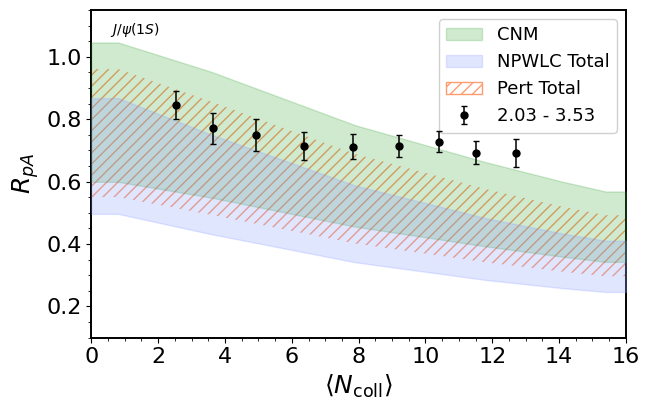

In [29]:
# --- 2) RpA vs <Ncoll>: theory bands + experimental points -------------------
# Forward
compare_total_vs_Ncoll(
    MODELS,
    y_window=(2.03, 3.53), ylim=(0.1,1.15),pt_range=(0.0, 20.0), state="jpsi_1S",
    what=["CNM","Total"], xlim=(0,16), span_full_x=True, draw_central=False,
    legend_title=None,
    exp_df=df8_fwd, exp_by="rapidity",
    save_pdf=f"{outPath}/RpA_vs_Ncoll_Jpsi1S_8TeV_forward.pdf"
)

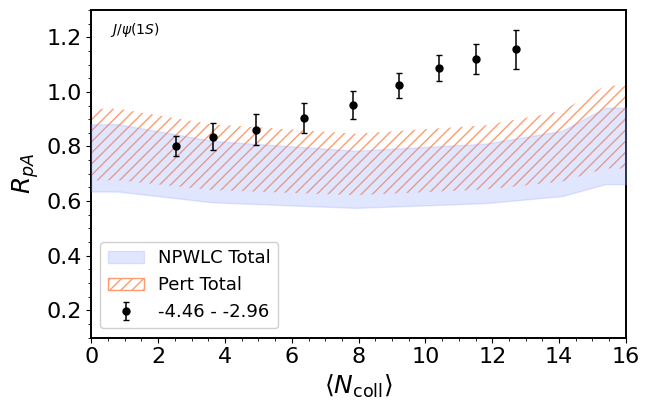

In [30]:
# Backward
compare_total_vs_Ncoll(
    MODELS,
    y_window=(-4.46, -2.96), ylim=(0.1,1.3),pt_range=(0.0, 20.0), state="jpsi_1S",
    what=["Total"], xlim=(0,16), span_full_x=True, draw_central=False,
    exp_df=df8_bwd, exp_by="rapidity",
    save_pdf=f"{outPath}/RpA_vs_Ncoll_Jpsi1S_8TeV_backward.pdf"
)

## $R_{pA}$ vs Rapidity ($y$)

In [31]:
# CNM table columns you can rely on
C = C8NPWLC
tab = C.cnm_vs_centrality((-5,5),(0,20))
print(tab.columns)      # ['cent_bin','r_central','r_lo','r_hi','eloss','eloss_lo','eloss_hi','cnm_c','cnm_lo','cnm_hi']
print(tab.head())

# Primordial & Total tables
prim = C.primordial_vs_centrality((0,20),(-5,5),"jpsi_1S")
tot  = C.total_vs_centrality((-5,5),(0,20),"jpsi_1S")
print(prim.head()); print(tot.head())

# Per-centrality vs y (the source of the y-figures)
cb = list(C.ctab["cent_bin"])[-1]   # e.g. '90-100%'
yb = [(y,y+0.5) for y in np.arange(-5,5,0.5)]
print(C._cnm_vs_y_in_cent(cb, yb, (0,20)).head())
print(C._primordial_vs_y_in_cent(cb, yb, (0,20), "jpsi_1S").head())

Index(['cent_bin', 'r_central', 'r_lo', 'r_hi', 'eloss', 'eloss_lo',
       'eloss_hi', 'cnm_c', 'cnm_lo', 'cnm_hi'],
      dtype='object')
     cent_bin  r_central      r_lo      r_hi     eloss  eloss_lo  eloss_hi  \
0   0.0-10.0%   0.730135  0.558266  0.834327  0.869844  0.823434  0.916255   
1  10.0-20.0%   0.752906  0.573615  0.861875  0.832672  0.805966  0.859379   
2  20.0-40.0%   0.792930  0.599231  0.911658  0.813060  0.800429  0.825692   
3  40.0-60.0%   0.861478  0.642251  0.997776  0.808049  0.805723  0.810376   
4  60.0-80.0%   0.936948  0.689613  1.092589  0.849046  0.837150  0.860941   

      cnm_c    cnm_lo    cnm_hi  
0  0.635104  0.481812  0.731862  
1  0.626924  0.476286  0.719861  
2  0.644700  0.486893  0.741752  
3  0.696117  0.518959  0.806270  
4  0.795512  0.585218  0.928127  
  cent_bin         c        lo        hi
0    0-10%  0.779856  0.760960  0.798752
1   10-20%  0.779793  0.760865  0.798721
2   20-40%  0.784257  0.765607  0.802906
3   40-60%  0.799809  0

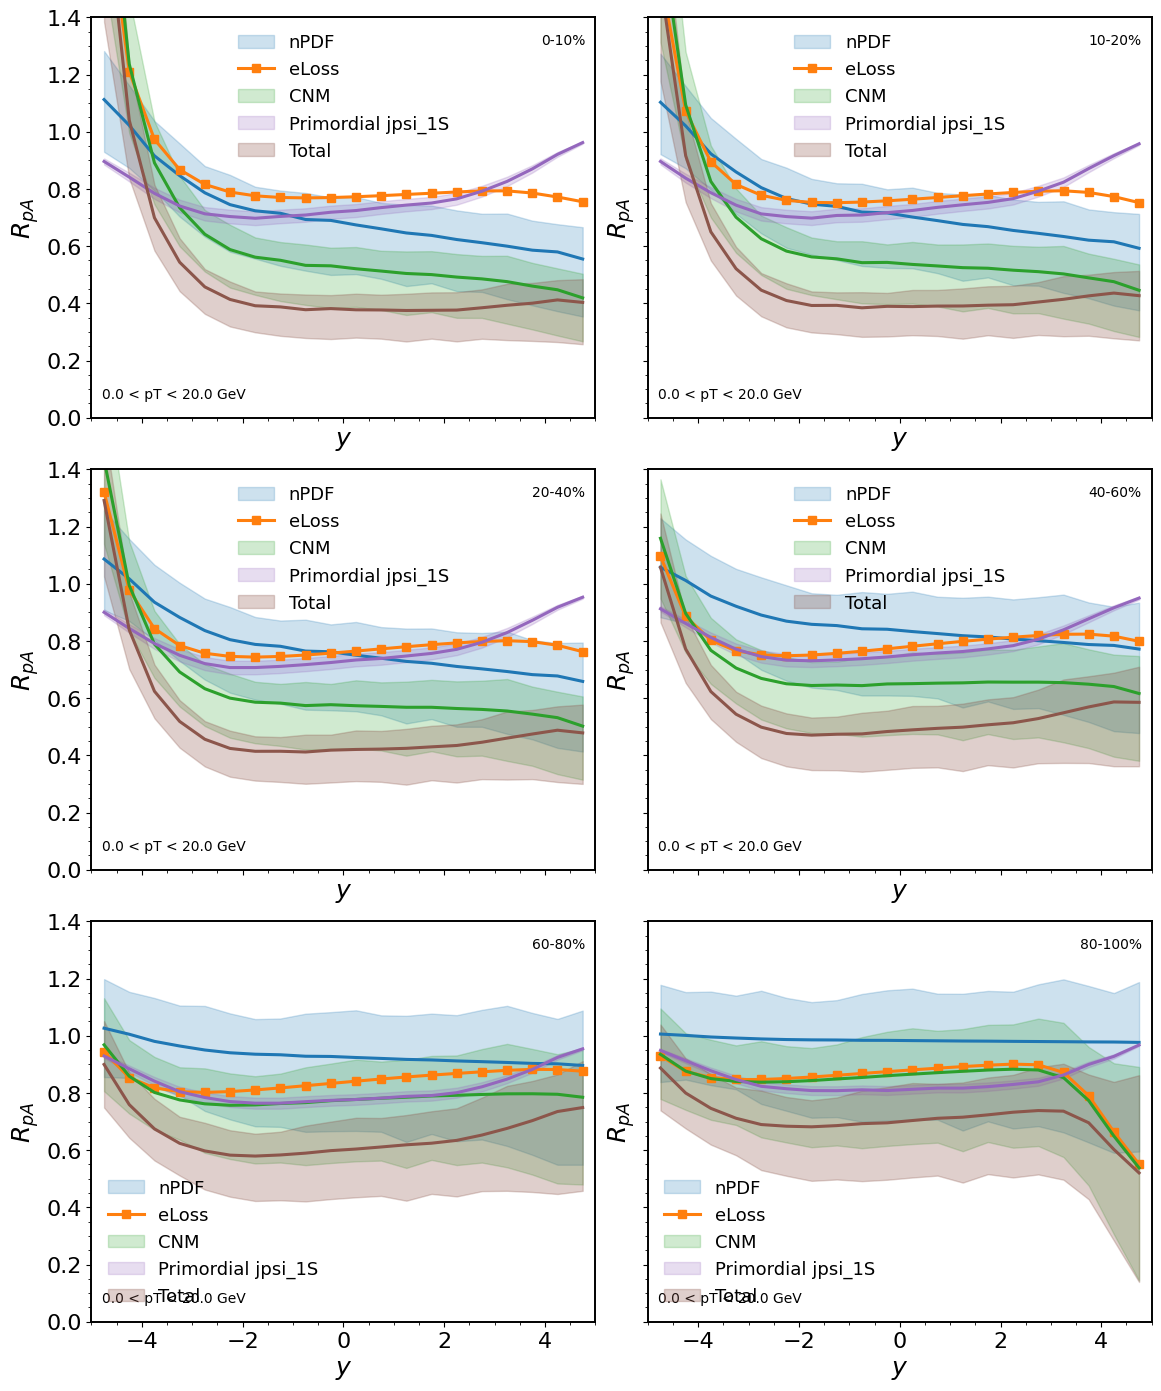

In [32]:
# --- COMPONENT-wise vs y (per centrality), as bands
from compare_helpers import components_vs_y_per_centrality

# --- Components vs y (per centrality)
components_vs_y_per_centrality(
    C8NPWLC, state="jpsi_1S",
    pt_range=(0.0, 20.0), y_width=0.5,
    components=("nPDF","eLoss","CNM","Primordial", "Total"),
    save_pdf_prefix=f"{outPath}/components_vs_y_byCent_8TeV_NPWLC",
    note="0.0 < pT < 20.0 GeV", ylim=(0.0,1.4)
)

# components_vs_y_per_centrality(
#     C8Pert, state="jpsi_1S",
#     pt_range=(0.0, 20.0), y_width=0.5,
#     components=("nPDF","eLoss","CNM","Primordial", "Total"),
#     save_pdf_prefix=f"{outPath}/components_vs_y_byCent_8TeV_Pert",
#     note="0.0 < pT < 20.0 GeV"
# )

In [33]:
# # --- Total vs y : per-centrality, NPWLC vs Pert (FAST + robust)
# YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
# compare_total_vs_y_per_centrality(
#     MODELS, pt_range=(0.0, 20.0), y_bins=YBINS_05, state="jpsi_1S",
#     model_styles=MODEL_STYLES, ylim=(0.0,1.4),
#     save_pdf_prefix=f"{outPath}/cmp_Total_vs_y_bycent_8TeV_Jpsi1S"
# )

In [34]:
# compare_total_vs_y_per_centrality(
#     MODELS,
#     pt_range=(0.0, 20.0),
#     y_bins=YBINS_05,
#     state="psi_2S",
#     model_styles=MODEL_STYLES,
#     save_pdf_prefix=f"{outPath}/cmp_Total_vs_y_bycent_5TeV_Psi2S"
# )

## $R_{pA}$ vs Transverse Momentum

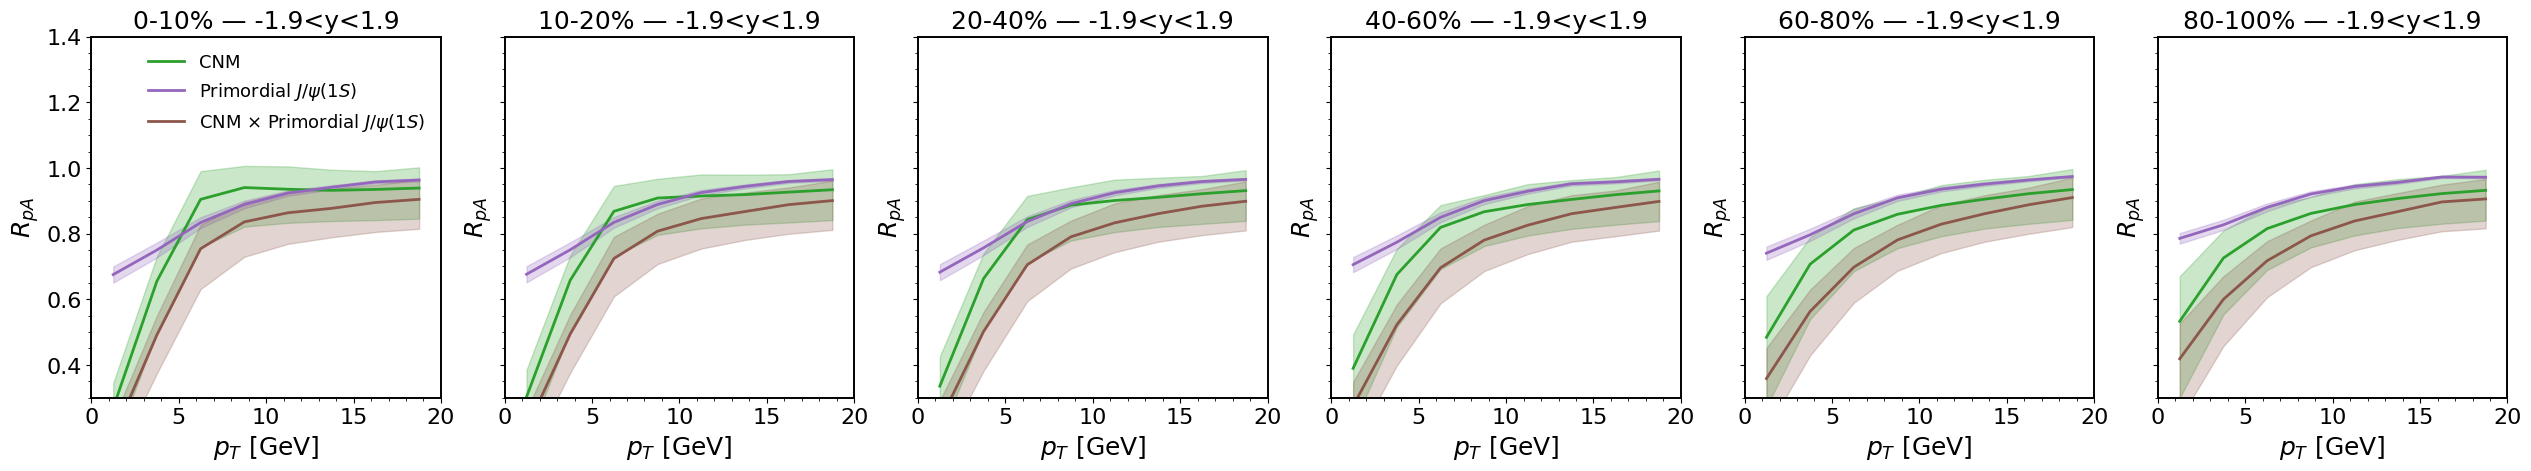

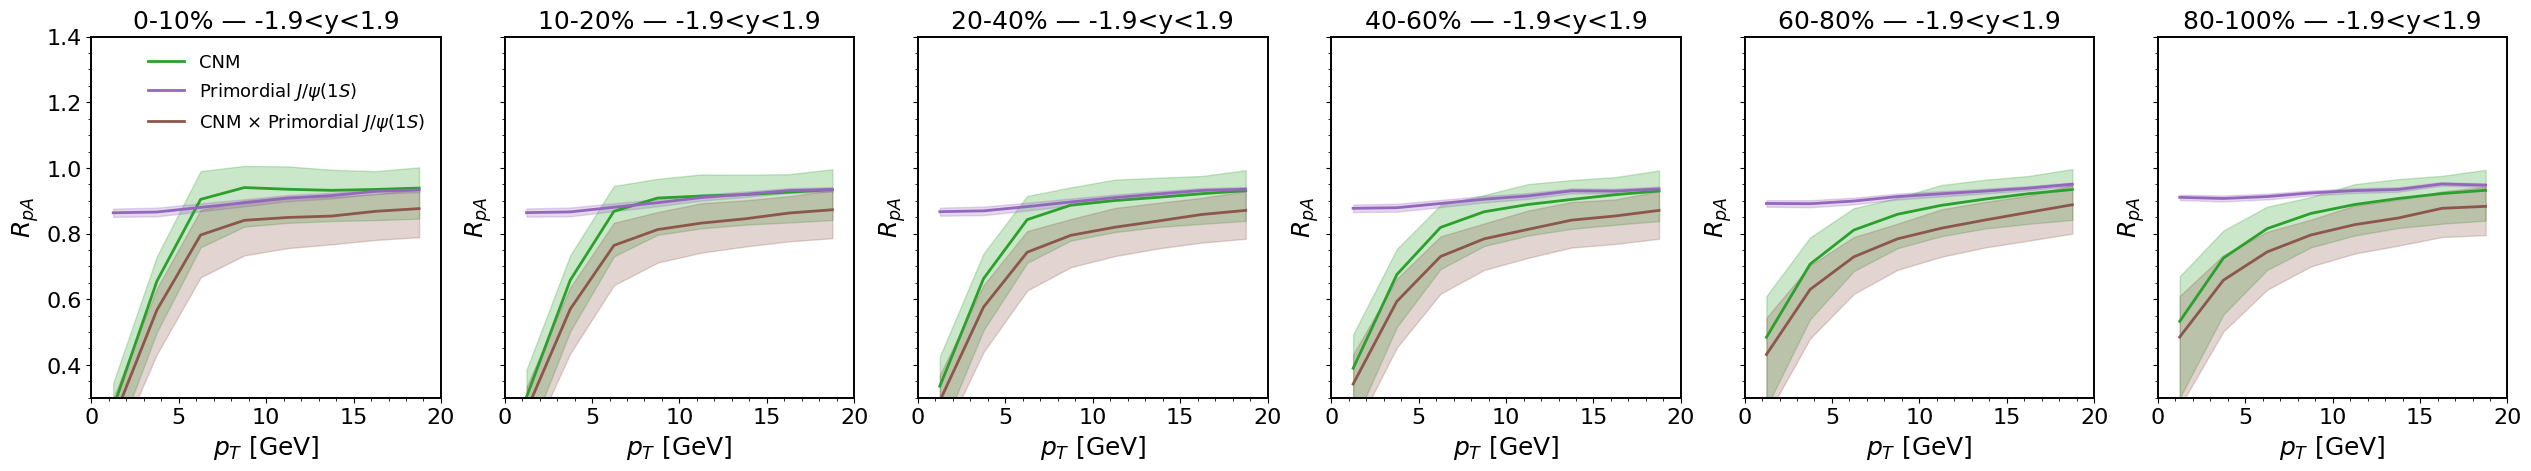

In [35]:
# --- COMPONENT-wise vs pT (per centrality), as bands
from combine_module import PT_BINS_2P5, Y_WINDOWS_3

C8NPWLC.figure_total_vs_pt_per_centrality(
    y_windows=[(-1.93,1.93)],
    pt_bins=PT_BINS_2P5,
    states=["jpsi_1S"],  # legend content is identical across states, so use the first state's color
    save_pdf_prefix=f"{outPath}/Total_vs_pT_byCent_8TeV_NPWLC",
    ylim=(0.3, 1.4),
)

C8Pert.figure_total_vs_pt_per_centrality(
    y_windows=[(-1.93,1.93)],
    # y_windows=[(-1.93,1.93), (1.5,4.0), (-5.0,-2.5)],
    pt_bins=PT_BINS_2P5,
    states=["jpsi_1S"],
    save_pdf_prefix=f"{outPath}/Total_vs_pT_byCent_8TeV_Pert",
    ylim=(0.3, 1.4),
)

In [36]:
def compare_total_vs_pt_per_centrality(models, y_windows, pt_bins, state, *,
                                       ylim=(0.0,1.6), xlim=(0.0,20.0),
                                       exp_panels=None,
                                       exp_style=dict(fmt="o", ms=4),
                                       legend_loc="best", save_pdf_prefix=None):
    import numpy as np, matplotlib.pyplot as plt
    try:
        from compare_helpers import MODEL_STYLES, _note
    except Exception:
        MODEL_STYLES = {}
        def _note(ax, text, loc="upper left", pad=0.035, fs=10):
            ha = "left" if "left" in loc else "right"
            va = "top"  if "upper" in loc else "bottom"
            x  = pad if "left" in loc else 1 - pad
            y  = 1 - pad if "upper" in loc else pad
            ax.text(x, y, text, transform=ax.transAxes, ha=ha, va=va, fontsize=fs)

    def _extend_to_xlim(x, lo, hi, xlim):
        x  = np.asarray(x, float); lo = np.asarray(lo, float); hi = np.asarray(hi, float)
        if x.size == 0: return x, lo, hi
        xs, los, his = x, lo, hi
        if xs[0] > xlim[0]:
            xs  = np.r_[xlim[0], xs]
            los = np.r_[los[0],  los]
            his = np.r_[his[0],  his]
        if xs[-1] < xlim[1]:
            xs  = np.r_[xs,  xlim[1]]
            los = np.r_[los, lo[-1]]
            his = np.r_[his, hi[-1]]
        return xs, los, his

    cent_bins = list(next(iter(models.values())).ctab["cent_bin"])
    for yw in y_windows:
        n = len(cent_bins); ncols = 2; nrows = int(np.ceil(n/ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(11.5, 4.6*nrows),
                                 sharex=True, sharey=True, constrained_layout=True)
        axes = np.atleast_1d(axes).ravel()

        for ax, cb in zip(axes, cent_bins):
            ax.set_xlabel(r"$p_T$ [GeV]")
            ax.set_ylabel(r"$R_{pA}$")
            ax.minorticks_on()
            ax.set_xlim(*xlim)
            ax.set_ylim(*ylim)

            drew_cnm = False  # draw CNM at most once per panel (optional block below)

            for label, C in models.items():
                cnm_df, prim_df, tot_df = C.total_vs_pt_in_centrality(cb, state, yw, pt_bins)
                st = MODEL_STYLES.get(label, {})

                # --- optional: CNM band once (uncomment if desired) ---
                # if (not drew_cnm) and (not cnm_df.empty):
                #     ax.fill_between(cnm_df["pt"], cnm_df["lo"], cnm_df["hi"],
                #                     alpha=0.22, color="#2ca02c", label="CNM", zorder=1.5)
                #     ax.plot(cnm_df["pt"], cnm_df["c"], "-", color="#2ca02c", zorder=1.6)
                #     drew_cnm = True

                if tot_df.empty:
                    continue

                # extend band to panel edges to avoid truncation
                xb, lob, hib = _extend_to_xlim(tot_df["pt"], tot_df["lo"], tot_df["hi"], xlim)
                ax.fill_between(
                    xb, lob, hib,
                    alpha=st.get("band_alpha", 0.25),
                    color=st.get("color", None),
                    zorder=st.get("z", 2),
                )
                ax.plot(
                    tot_df["pt"], tot_df["c"],
                    lw=2.2,
                    color=st.get("color", None),
                    marker=st.get("marker", "o"),
                    label=f"{label} Total",
                )

            # overlay experiment if provided for this centrality
            if exp_panels and cb in exp_panels:
                g = exp_panels[cb]
                x  = g["pt"].to_numpy(float)
                xe = np.vstack([x - g["ptlo"], g["pthi"] - x]).astype(float)
                ye = g["dtot"].to_numpy(float) if "dtot" in g else None
                ax.errorbar(x, g["val"], xerr=xe, yerr=ye, color="black",
                            ecolor="black", capsize=2, lw=1.0, **exp_style)

            _note(ax, PRETTY_STATE.get(state, state), loc="upper left")
            _note(ax, f"{cb}", loc="upper right")
            _note(ax, f"{yw[0]:.2f} < y < {yw[1]:.2f}", loc="lower right")
            ax.legend(frameon=False, loc=legend_loc)

        for j in range(n, nrows*ncols):
            axes[j].set_visible(False)
        if save_pdf_prefix:
            plt.savefig(f"{save_pdf_prefix}_{state}_{yw[0]:.2f}_{yw[1]:.2f}.pdf",
                        bbox_inches="tight", dpi=300)
        plt.show()

In [37]:
# def compare_total_vs_pt_per_centrality(models, y_windows, pt_bins, state, *,
#                                        ylim=(0.0,1.6), xlim=(0.0,20.0),
#                                        exp_panels=None, 
#                                        exp_style=dict(fmt="o", ms=4), 
#                                        legend_loc="best", save_pdf_prefix=None):
#     import numpy as np, matplotlib.pyplot as plt
#     try:
#         # if you already imported these elsewhere, this is a no-op
#         from compare_helpers import MODEL_STYLES, _note
#     except Exception:
#         # minimal fallback so the function still works
#         MODEL_STYLES = {}
#         def _note(ax, text, loc="upper left", pad=0.035, fs=10):
#             ha = "left"  if "left"  in loc else "right"
#             va = "top"   if "upper" in loc else "bottom"
#             x  = pad if "left" in loc else 1 - pad
#             y  = 1 - pad if "upper" in loc else pad
#             ax.text(x, y, text, transform=ax.transAxes, ha=ha, va=va, fontsize=fs)

#     cent_bins = list(next(iter(models.values())).ctab["cent_bin"])
#     for yw in y_windows:
#         n = len(cent_bins); ncols = 2; nrows = int(np.ceil(n/ncols))
#         fig, axes = plt.subplots(nrows, ncols, figsize=(11.5, 4.6*nrows),
#                                  sharex=True, sharey=True, constrained_layout=True)
#         axes = np.atleast_1d(axes).ravel()

#         for ax, cb in zip(axes, cent_bins):
#             ax.set_xlabel(r"$p_T$ [GeV]")
#             ax.set_ylabel(r"$R_{pA}$")
#             ax.minorticks_on()
#             ax.set_xlim(*xlim)
#             ax.set_ylim(*ylim)

#             for label, C in models.items():
#                 cnm_df, prim_df, tot_df = C.total_vs_pt_in_centrality(cb, state, yw, pt_bins)
#                 if tot_df.empty:
#                     continue
#                 st = MODEL_STYLES.get(label, {})
#                 ax.fill_between(
#                     tot_df["pt"], tot_df["lo"], tot_df["hi"],
#                     alpha=st.get("band_alpha", 0.25),
#                     color=st.get("color", None),
#                     zorder=st.get("z", 2),
#                 )
#                 ax.plot(
#                     tot_df["pt"], tot_df["c"],
#                     lw=2.2,
#                     color=st.get("color", None),
#                     marker=st.get("marker", "o"),
#                     label=f"{label} Total",
#                 )
#             # overlay experiment if provided for this centrality
#             if exp_panels and cb in exp_panels:
#                 g = exp_panels[cb]
#                 x  = g["pt"].to_numpy(float)
#                 xe = np.vstack([x - g["ptlo"], g["pthi"] - x]).astype(float)
#                 ye = g["dtot"].to_numpy(float) if "dtot" in g else None
#                 ax.errorbar(x, g["val"], xerr=xe, yerr=ye, color="black",
#                             ecolor="black", capsize=2, lw=1.0, **exp_style)
            
#             # in-panel notes (no extra '%' — cb already has it)
#             _note(ax, PRETTY_STATE.get(state, state), loc="upper left")
#             _note(ax, f"{cb}", loc="upper right")
#             _note(ax, f"{yw[0]:.2f} < y < {yw[1]:.2f}", loc="lower right")
#             ax.legend(frameon=False, loc=legend_loc)

#         for j in range(n, nrows*ncols):
#             axes[j].set_visible(False)
#         if save_pdf_prefix:
#             plt.savefig(f"{save_pdf_prefix}_{state}_{yw[0]:.2f}_{yw[1]:.2f}.pdf",
#                         bbox_inches="tight", dpi=300)
#         plt.show()

In [38]:
# # --- Total vs pT, per centrality (your working figure — now with in-panel notes)
# PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
# compare_total_vs_pt_per_centrality(
#     MODELS, y_windows=[(-1.93,1.93)], pt_bins=PT_BINS_2P5, state="jpsi_1S",
#     save_pdf_prefix=f"{outPath}/cmp_Total_vs_pt_bycent_5TeV_Jpsi1S"
# )

In [39]:
# # --- Total vs pT, per centrality (your working figure — now with in-panel notes)
# PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
# for yw in [(-1.93,1.93), (1.5,4.0), (-5.0,-2.5)]:
#     compare_total_vs_pt_per_centrality(
#         MODELS, y_windows=[yw], pt_bins=PT_BINS_2P5, state="jpsi_1S",
#         save_pdf_prefix=f"{outPath}/cmp_Total_vs_pt_bycent_5TeV_Jpsi1S"
#     )

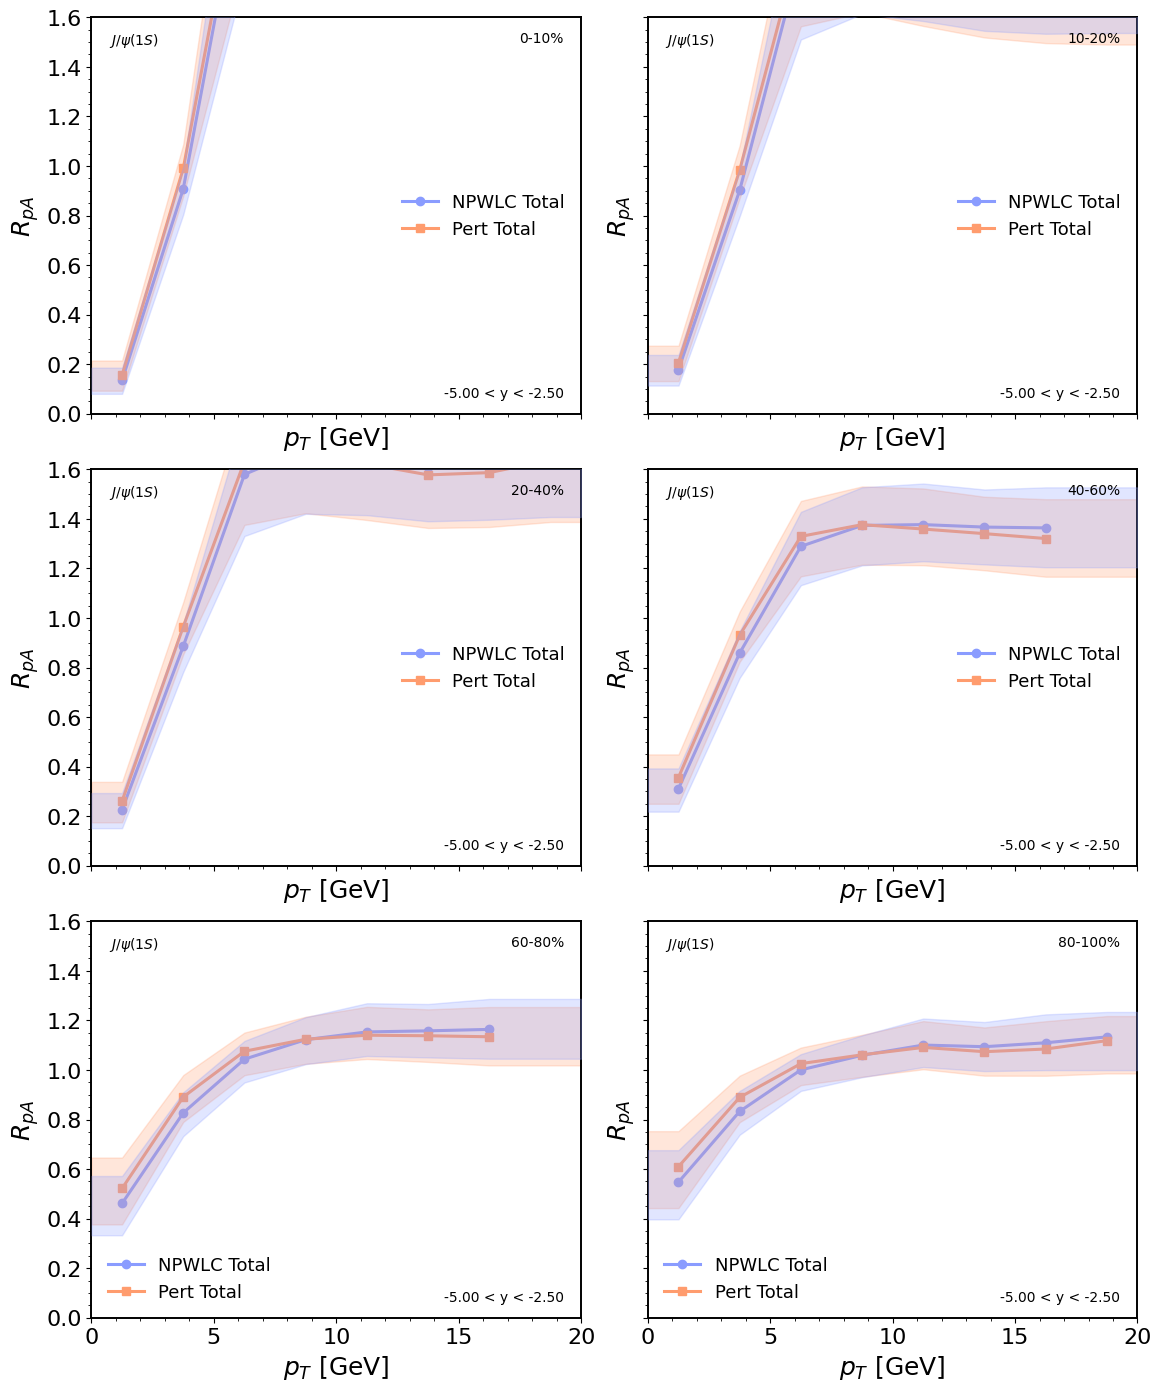

In [40]:
# --- Total vs pT, per centrality (your working figure — now with in-panel notes)
PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
for yw in [(-5.0,-2.5)]:
    compare_total_vs_pt_per_centrality(
        MODELS, y_windows=[yw], pt_bins=PT_BINS_2P5, state="jpsi_1S",
        save_pdf_prefix=f"{outPath}/cmp_Total_vs_pt_bycent_5TeV_jpsi1S"
    )

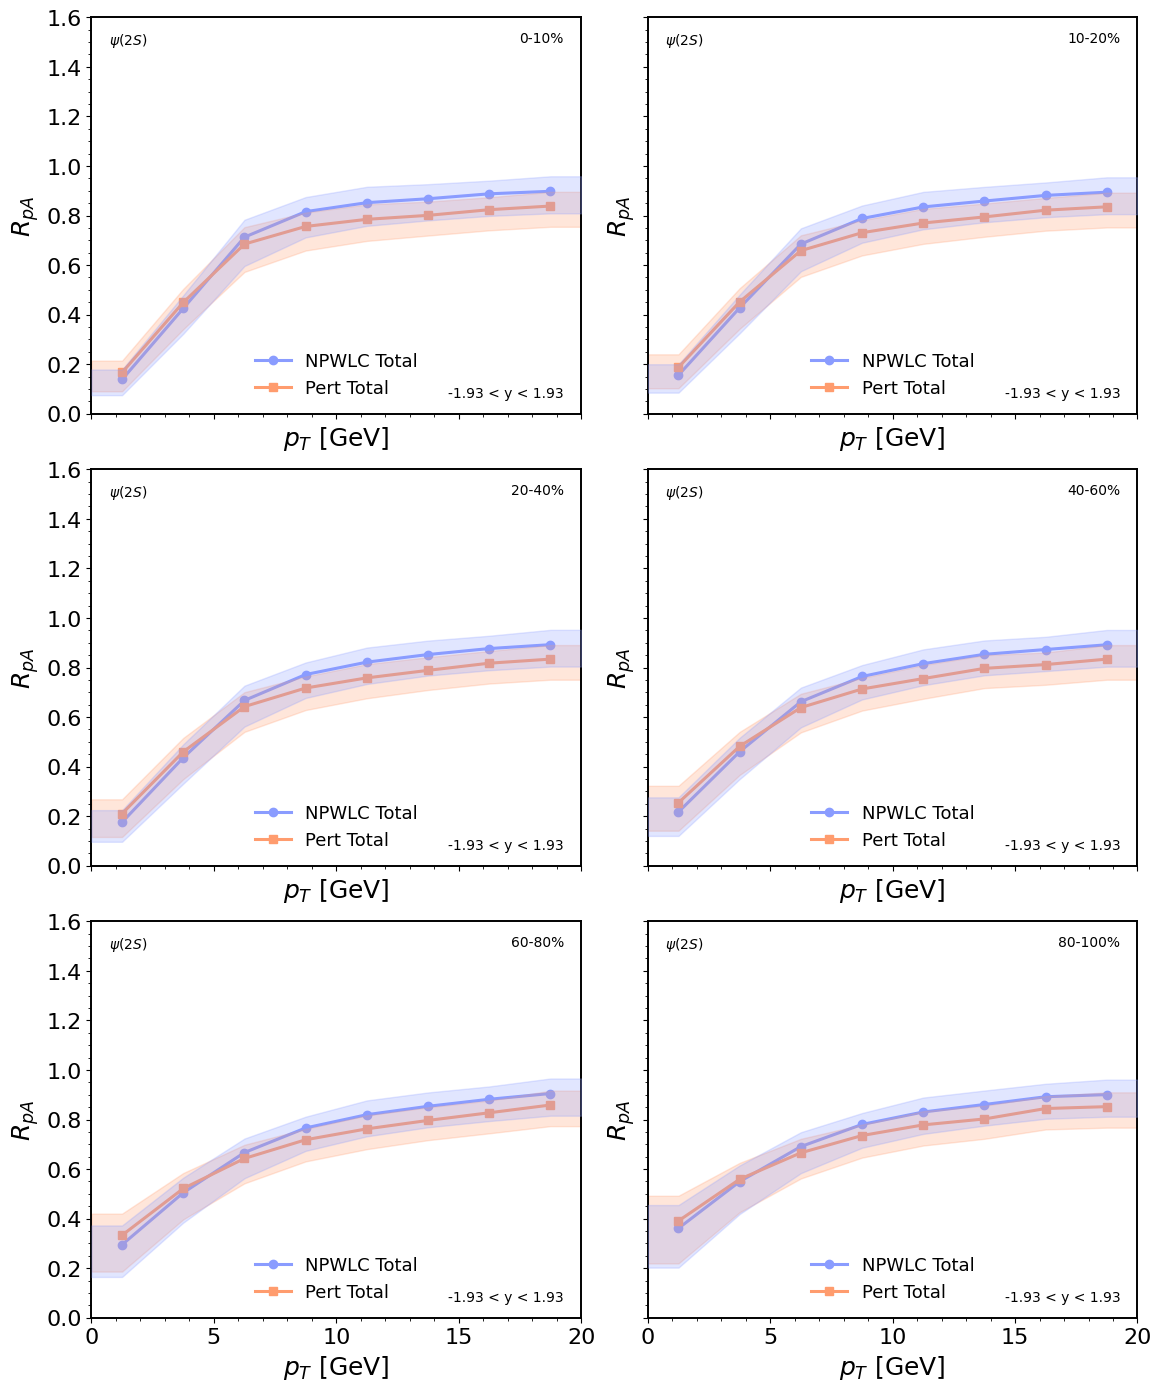

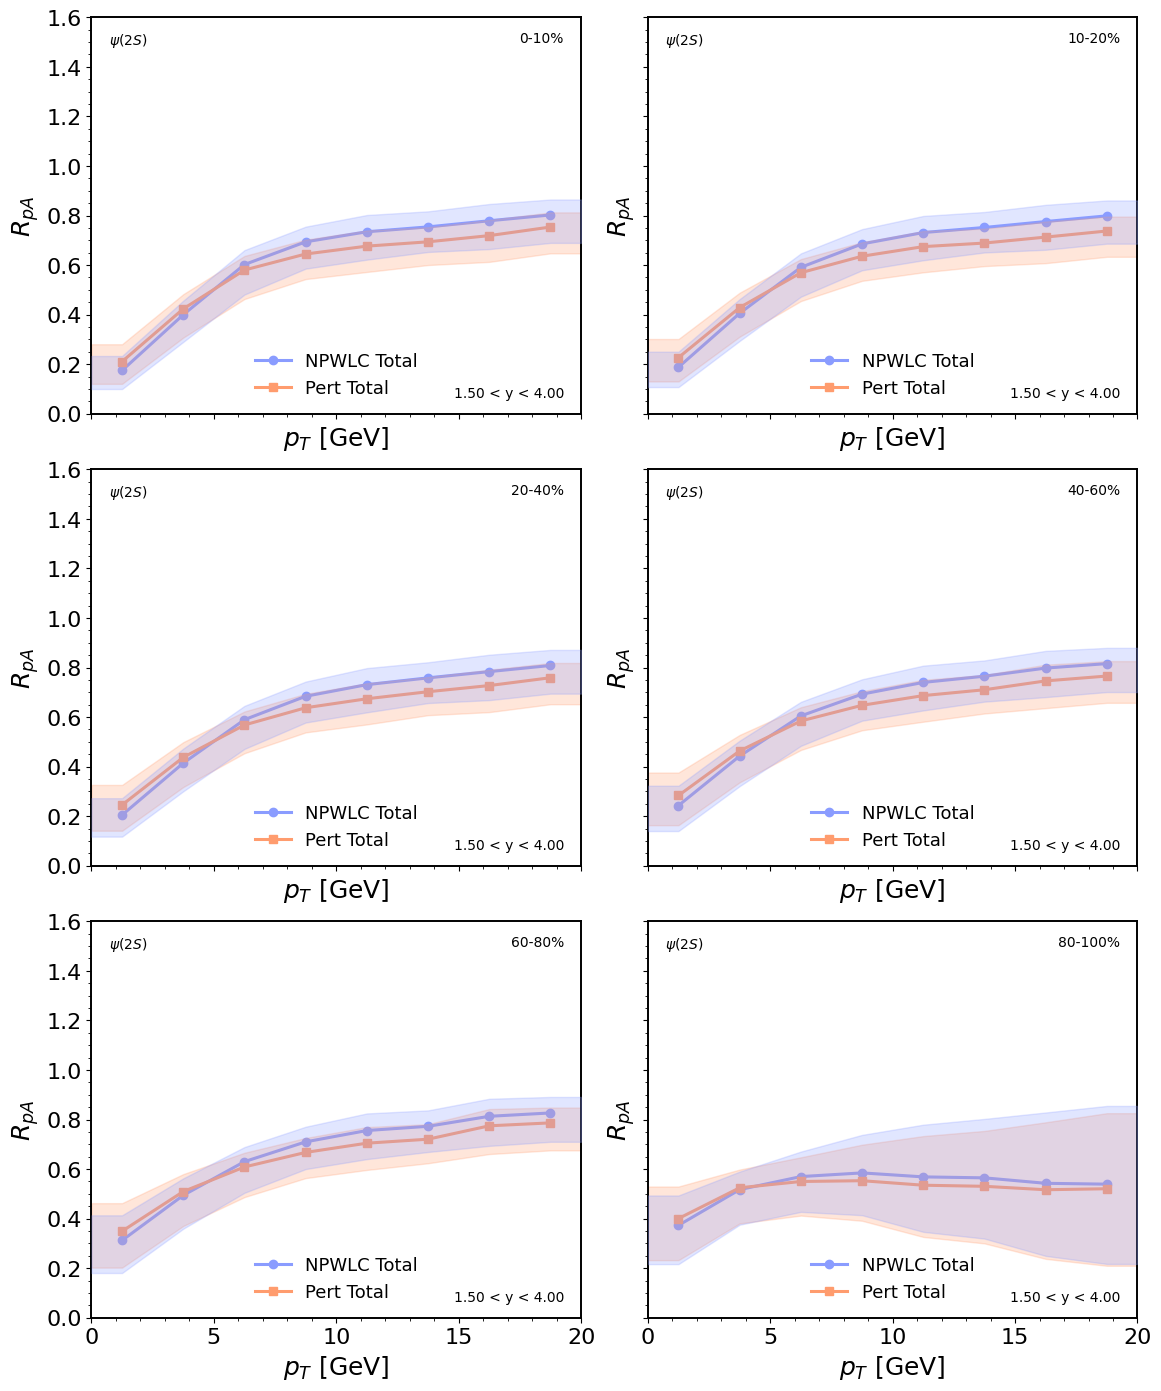

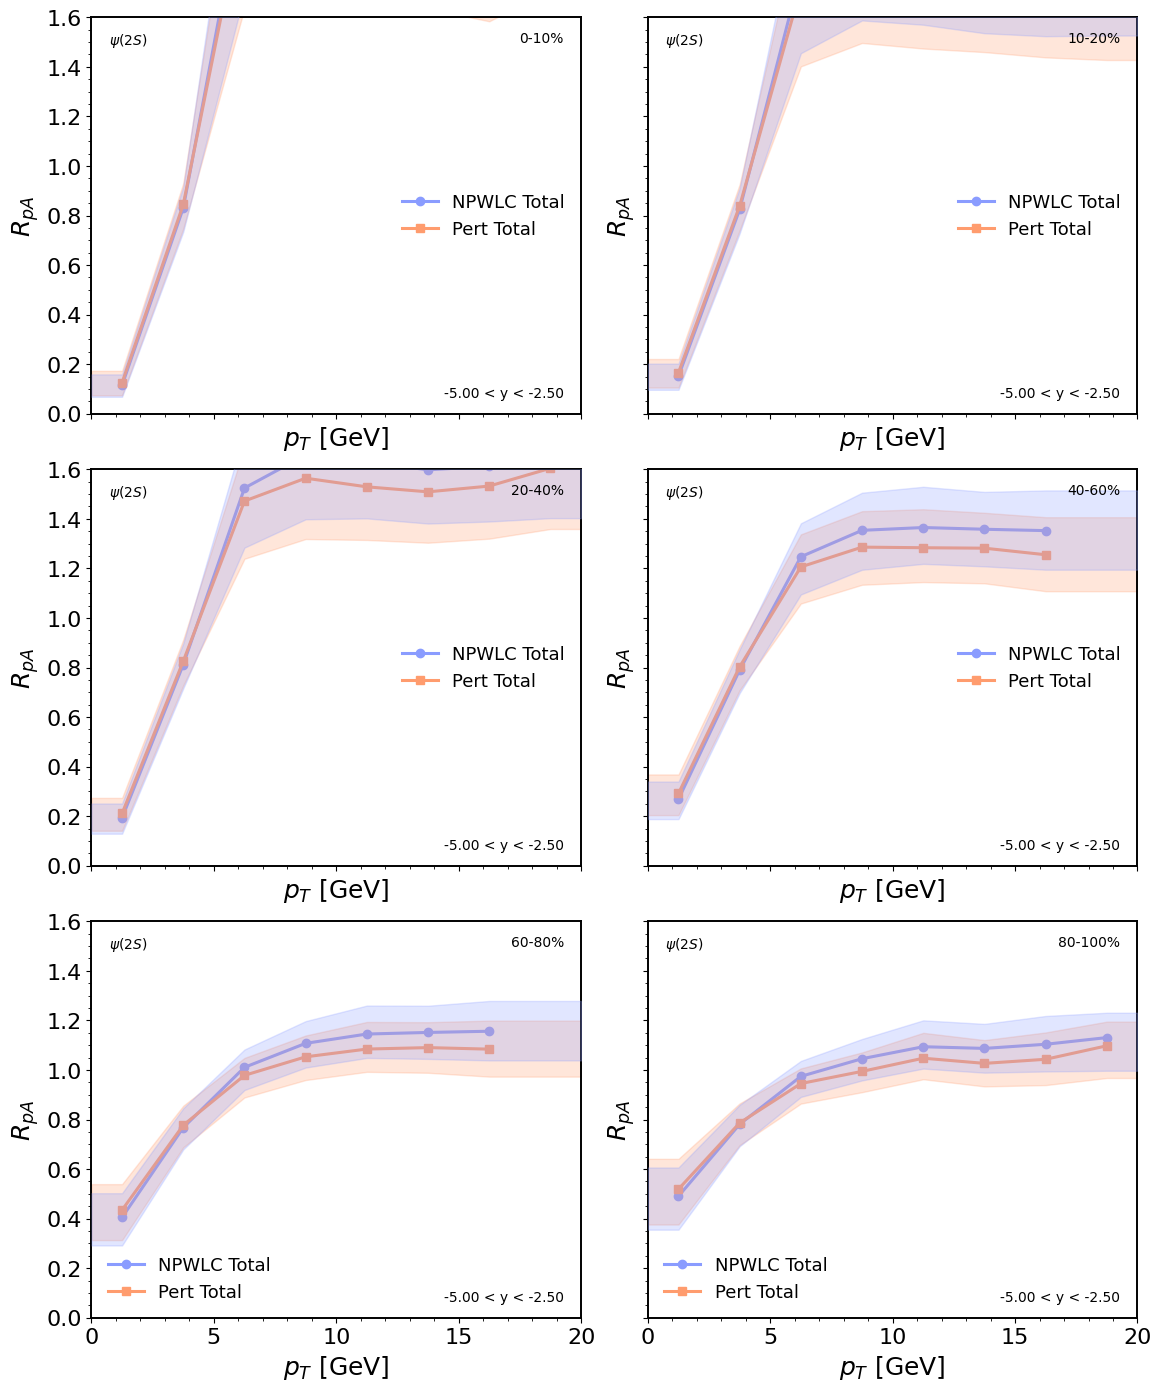

In [41]:
# --- Total vs pT, per centrality (your working figure — now with in-panel notes)
PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
for yw in [(-1.93,1.93), (1.5,4.0), (-5.0,-2.5)]:
    compare_total_vs_pt_per_centrality(
        MODELS, y_windows=[yw], pt_bins=PT_BINS_2P5, state="psi_2S",
        save_pdf_prefix=f"{outPath}/cmp_Total_vs_pt_bycent_5TeV_psi2S"
    )

<!-- ## $R_{pA}$ vs $y$ and $p_T$ (Centrality Integrated) -->

In [42]:
# --- 3) RpA vs pT at forward/backward y --------------------------------------
from combine_module import Combiner

def _exp_pt_table(energy="8TeV"):
    # reader.rpa_vs_pt returns a list of DataFrames (grouped by [rapidity, centrality])
    frames = reader.rpa_vs_pt(energy)
    if not frames:
        return pd.DataFrame()
    df = pd.concat(frames, ignore_index=True)

    out = pd.DataFrame({
        "rapidity":   df["rapidity"].astype(str),
        "centrality": df["centrality"].astype(str).str.replace("–","-"),
        "pt":   df["x_cen"].astype(float),
        "ptlo": df["x_low"].astype(float),
        "pthi": df["x_high"].astype(float),
        "val":  df["value"].astype(float),
        # stat ⊕ uncorrelated only (don’t include correlated/common)
        "dtot": np.sqrt(
            np.nan_to_num(df["stat_up"].fillna(df["stat_dn"]).astype(float), 0.0)**2 +
            np.nan_to_num(df["sys_uncorr_up"].fillna(df["sys_uncorr_dn"]).astype(float), 0.0)**2
        ),
    }).reset_index(drop=True)
    return out

In [43]:
# 1) Build the tidy experimental pT table from your reader
exppt_raw = reader.rpa_vs_pt("8TeV")          # list of DFs grouped by (rapidity, centrality)
exppt = pd.concat(exppt_raw, ignore_index=True)

# 2) Map ALICE bins to your model bins (forces 80–90% → 80–100%)
C0 = next(iter(MODELS.values()))              # any Combiner
exppt_mapped = C0.prepare_exp_pt_overlay(exppt, force_last_bin_to_80_100=True)

/home/sawin/Desktop/Charmonia/charmonia_combined_analysis/code/hep_cent_data_reader.py:256: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(frames, ignore_index=True)


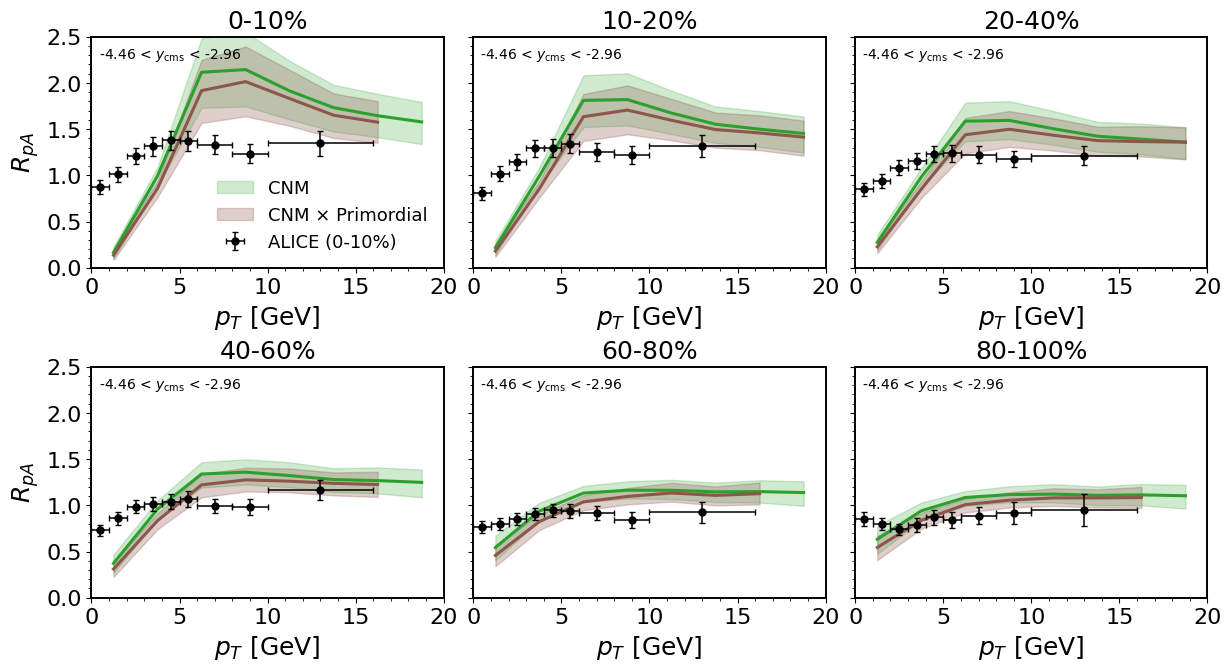

In [44]:
# 3) Backward rapidity panels (with Total + CNM as example)
C0.plot_vs_pt_by_centrality_with_experiment(
    y_window=(-4.46, -2.96), pt_bins=PT_BINS_2P5, state="jpsi_1S",
    components=("CNM","Total"),                # also allowed: "nPDF","eLoss","Primordial"
    ylim=(0.0,2.5),
    exppt=exppt_mapped,
    save_pdf=f"{outPath}/RpA_vs_pT_panels_8TeV_backward.pdf"
)


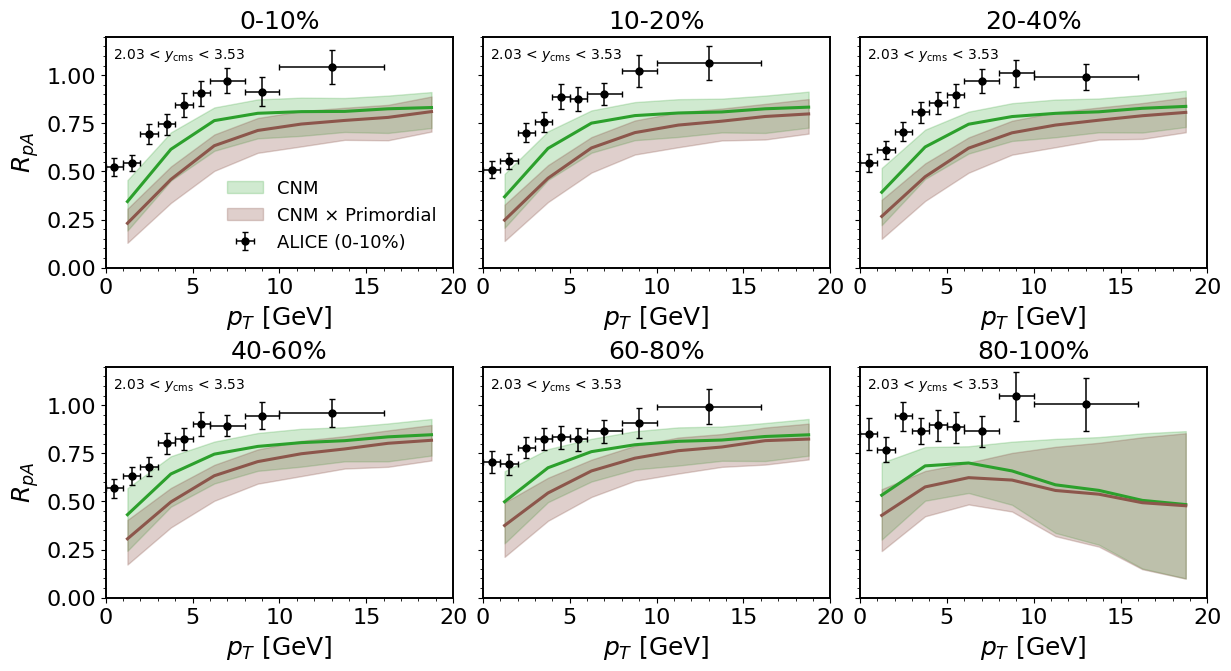

In [45]:
# 4) Forward rapidity panels
C0.plot_vs_pt_by_centrality_with_experiment(
    y_window=(2.03, 3.53), pt_bins=PT_BINS_2P5, state="jpsi_1S",
    components=("CNM","Total"),
    ylim=(0.0,1.2),
    exppt=exppt_mapped,
    save_pdf=f"{outPath}/RpA_vs_pT_panels_8TeV_forward.pdf"
)

## $R_{pA}$ vs $y$ and $p_T$ (Centrality Integrated)

TypeError: Usage: (cent_label, state, pt_range, y_width) or (cent_label, y_width, pt_range, state)

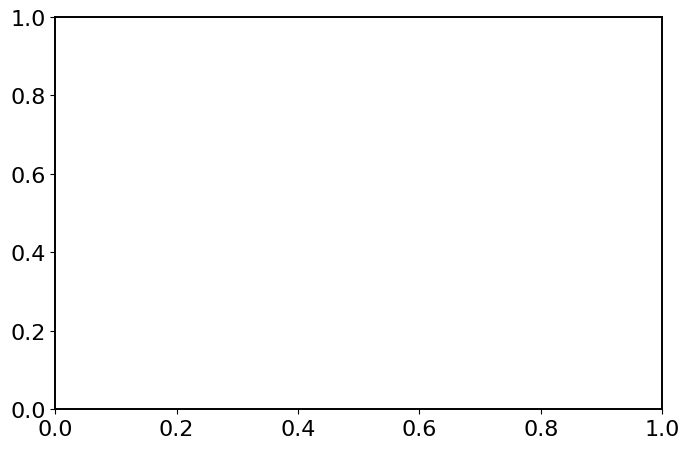

In [46]:
# 8.16 TeV, all states, centrality-integrated vs y
C8NPWLC.plot_total_vs_y_integrated_all_states(
    states=["jpsi_1S","psi_2S","chicJ_1P"],
    y_bins=[(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)],  # pairs
    pt_range=(0.0, 20.0),
    ylim=(0.3, 1.4),
    note="p+Pb 8.16 TeV",
    save=f"{outPath}/Total_vsY_integrated_all_states_8TeV_NPWLC.pdf"
)

TypeError: Usage: (cent_label, state, pt_range, y_width) or (cent_label, y_width, pt_range, state)

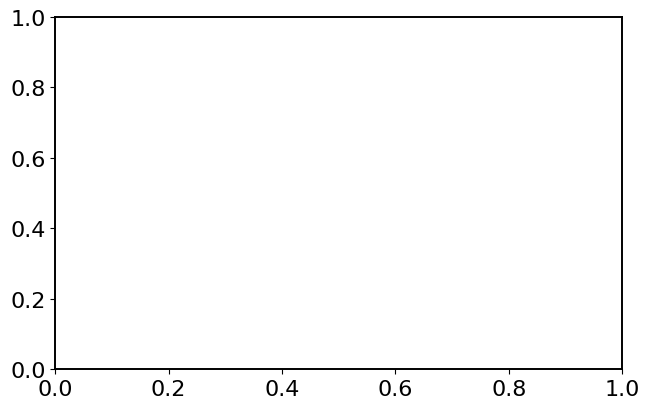

In [ ]:
# --- Centrality-integrated: Total vs y (bands), all states
YBINS_05 = np.arange(-5, 5.0+0.5, 0.5)  # edges
compare_total_vs_y_integrated(
    MODELS, y_bins=YBINS_05, pt_range=(0.0,20.0), state="jpsi_1S",
    model_styles=MODEL_STYLES,
    note="p+Pb 5.02 TeV",
    save_pdf=f"{outPath}/cmp_Total_vs_y_integrated_5TeV_1S.pdf"
)

TypeError: Usage: (cent_label, state, pt_range, y_width) or (cent_label, y_width, pt_range, state)

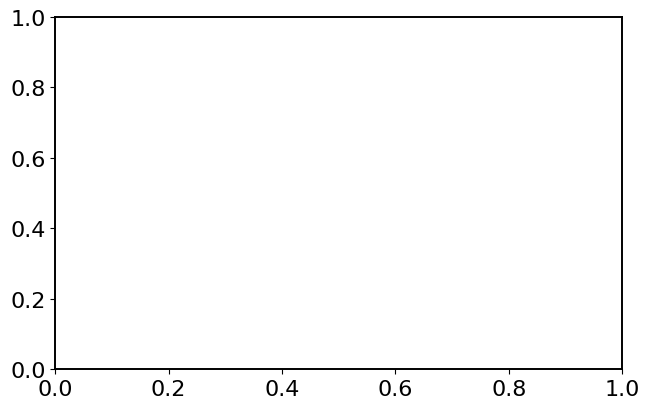

In [ ]:
YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
# ---- RpA(y) centrality-integrated (overlay NPWLC & Pert, same as your "WORKS") ----
compare_total_vs_y_integrated(
    MODELS, y_bins=0.5, pt_range=(0.0,20.0), state="jpsi_1S",
    model_styles=MODEL_STYLES
)

In [ ]:
# ---- RpA(y) centrality-integrated (overlay NPWLC & Pert, same as your "WORKS") ----
compare_total_vs_y_integrated(
    MODELS, y_bins=YBINS_05, pt_range=(0.0,20.0), state="psi_2S",
    model_styles=MODEL_STYLES,
    note="p+Pb 5.02 TeV",
    save_pdf=f"{outPath}/cmp_Total_vs_y_integrated_5TeV_2S.pdf"
)

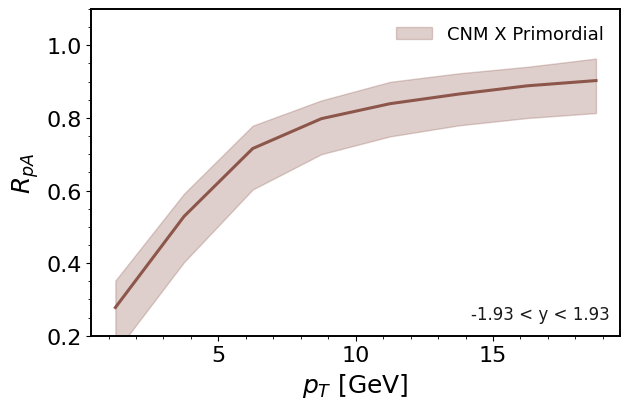

,pt,c,lo,hi
0,1.25,0.277726,0.154415,0.351883
1,3.75,0.528682,0.402661,0.591260
2,6.25,0.715609,0.602792,0.778591
3,8.75,0.797927,0.700071,0.848142
4,11.25,0.839181,0.749021,0.899237
5,13.75,0.865637,0.779436,0.922801
6,16.25,0.888417,0.799720,0.940797
7,18.75,0.902852,0.813395,0.963392


In [ ]:
# --- Centrality-integrated: Total vs pT (band), one state
C8NPWLC.total_vs_pt_integrated_over_centrality(
    y_window=(-1.93,1.93), pt_bins=PT_BINS_2P5, state="jpsi_1S",
    plot=True, ylim=(0.2, 1.1),
    save=f"{outPath}/Total_vsPT_integrated_Jpsi_mid_8TeV_NPWLC.pdf"
)

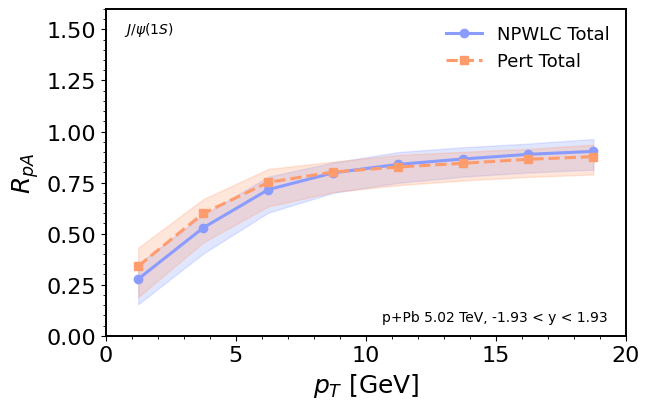

In [ ]:
# ---- RpA(pT) centrality-integrated (overlay NPWLC & Pert) ----
PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
compare_total_vs_pt_integrated(
    MODELS, y_window=(-1.93,1.93), pt_bins=PT_BINS_2P5, state="jpsi_1S",
    model_styles=MODEL_STYLES,
    note="p+Pb 5.02 TeV, -1.93 < y < 1.93",
    save_pdf=f"{outPath}/cmp_Total_vs_pt_integrated_5TeV_1S_mid.pdf"
)

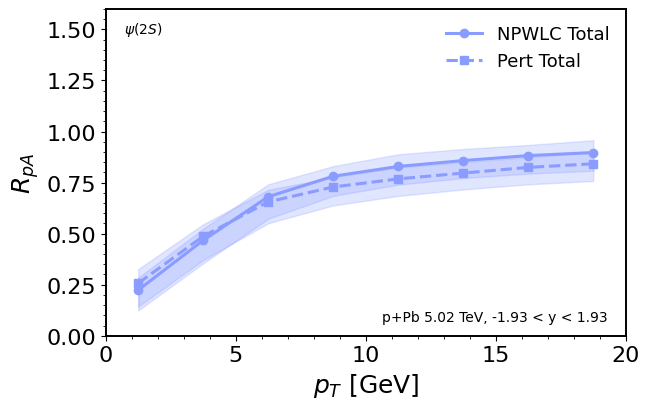

In [ ]:
# ---- RpA(pT) centrality-integrated (overlay NPWLC & Pert) ----
PT_BINS_2P5 = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
compare_total_vs_pt_integrated(
    MODELS, y_window=(-1.93,1.93), pt_bins=PT_BINS_2P5, state="psi_2S",
    model_styles=MODEL_STYLES,
    note="p+Pb 5.02 TeV, -1.93 < y < 1.93",
    save_pdf=f"{outPath}/cmp_Total_vs_pt_integrated_5TeV_2S_mid.pdf"
)

In [ ]:
# # --- Centrality-integrated summaries
# YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
# compare_total_vs_y_integrated(
#     MODELS, y_bins=YBINS_05, pt_range=(0.0,20.0), state="jpsi_1S",
#     note="p+Pb 5.02 TeV",
#     save_pdf=f"{outPath}/cmp_Total_vs_y_integrated_5TeV_1S.pdf"
# )
# compare_total_vs_pt_integrated(
#     MODELS, y_window=(-1.93,1.93), pt_bins=PT_BINS_2P5, state="psi_2S",
#     note="p+Pb 5.02 TeV, mid-y",
#     save_pdf=f"{outPath}/cmp_Total_vs_pt_integrated_5TeV_2S_mid.pdf"
# )

### Experimental Data

In [ ]:
# ========================== EXP. DATA LOADING (FINAL) ==========================
from pathlib import Path
import pandas as pd, numpy as np, re
import csv
CSV_ROOT  = Path("input/experimental_input")
Y_BWD     = (-4.46, -2.96)
Y_MID     = (-1.37, -0.43)
Y_FWD     = ( 2.03,  3.53)
Y_WINDOWS = [Y_BWD, Y_MID, Y_FWD]

# ---------- helpers ----------
def _to_num(s): return pd.to_numeric(s, errors="coerce")

def _csvsplit(line: str):
    # parses a single CSV line correctly (quotes, commas inside quotes, spaces)
    return next(csv.reader([line], skipinitialspace=True))

def _symmetrize_cols(p, m):
    if p is None and m is None: return 0.0
    if p is None: p = pd.Series([np.nan]*len(m), index=m.index)
    if m is None: m = pd.Series([np.nan]*len(p), index=p.index)
    p = _to_num(p).fillna(0.0).abs(); m = _to_num(m).fillna(0.0).abs()
    return 0.5*(p + m).to_numpy()

def _combine_quadrature_arrays(arrs):
    parts = [np.asarray(a, float) for a in arrs if a is not None]
    if not parts: return 0.0
    return np.sqrt((np.vstack(parts)**2).sum(axis=0))

def _parse_y_range(line):
    m = re.findall(r'(-?\d+(?:\.\d+)?)\s*-\s*(-?\d+(?:\.\d+)?)', line)
    if not m: return (np.nan, np.nan)
    a,b = m[-1]; return float(a), float(b)

def _guess_state_from_text(line):
    t = line.lower()
    # accept several ways the file may mention the states
    if ("psi(2s)" in t) or ("psi 2s" in t) or ("psip" in t):
        return "psi_2S"
    if ("j/psi" in t) or ("jpsi" in t):
        return "jpsi_1S"
    return None

def _table_to_frame(header, rows, *, experiment, state, ylo, yhi, is_double_ratio=False):
    df   = pd.DataFrame(rows, columns=header); cols = list(df.columns)
    def has(sub):
        for c in cols:
            if sub.lower() in c.lower(): return c
        return None

    col_ptlo = has("pt_low") or has("pt [gev] low")
    col_pthi = has("pt_high") or has("pt [gev] high")
    if col_ptlo is None or col_pthi is None:
        raise ValueError("pt-low/high columns not found: " + ", ".join(cols))

    if is_double_ratio:
        col_val = has("sigma")
    else:
        col_val = has("rpa") or next((c for c in cols if re.search(r"r.*p.*a", c.lower())), None)
    if col_val is None:
        raise ValueError("value column (RpA/sigma) not found: " + ", ".join(cols))

    col_stat_p = has("stat +") or has("stat_uncertainty +") or has("stat_uncertainty")
    col_stat_m = has("stat -")

    sys_groups = [
        ("sys,correl", has("sys,correl +"), has("sys,correl -")),
        ("sys,uncorr", has("sys,uncorr +"), has("sys,uncorr -")),
        ("sys,global", has("sys,global +"), has("sys,global -")),
        ("sys_1", has("sys_1 +"), has("sys_1 -")),
        ("sys_2", has("sys_2 +"), has("sys_2 -")),
        ("sys_3", has("sys_3 +"), has("sys_3 -")),
        ("sys_correlated_uncertainty", has("sys_correlated_uncertainty"), None),
        ("sys_uncorrelated_uncertainty", has("sys_uncorrelated_uncertainty"), None),
    ]

    for c in [col_ptlo, col_pthi, col_val, col_stat_p, col_stat_m]:
        if c is not None: df[c] = _to_num(df[c])
    for _, cp, cm in sys_groups:
        for c in (cp, cm):
            if c is not None: df[c] = _to_num(df[c])

    ptlo = _to_num(df[col_ptlo]).to_numpy()
    pthi = _to_num(df[col_pthi]).to_numpy()
    pt   = 0.5*(ptlo + pthi)
    val  = _to_num(df[col_val]).to_numpy()
    stat = _symmetrize_cols(df[col_stat_p] if col_stat_p else None,
                            df[col_stat_m] if col_stat_m else None)

    dglob = np.zeros_like(val, float)
    sys_non_global = []
    for name, cp, cm in sys_groups:
        if cp is None and cm is None: continue
        sym = _symmetrize_cols(df[cp] if cp else None, df[cm] if cm else None)
        if name.lower().startswith("sys,global"):
            dglob = sym
        else:
            sys_non_global.append(sym)

    dtot = _combine_quadrature_arrays([stat] + sys_non_global)

    return pd.DataFrame({
        "experiment": experiment,
        "state": state,
        "ylo": float(ylo) if np.isfinite(ylo) else np.nan,
        "yhi": float(yhi) if np.isfinite(yhi) else np.nan,
        "pt": pt, "ptlo": ptlo, "pthi": pthi,
        "val": val, "dtot": dtot, "dglob": dglob,
    })

# --- RpA(pT): multiple tables (J/ψ bwd/mid/fwd + ψ(2S) fwd) ---
def load_exp_rpa_vs_pt_tidy(csv_path: str | Path, *, experiment="ALICE") -> pd.DataFrame:
    lines = [ln.strip() for ln in open(csv_path, "r", encoding="utf-8").readlines()]
    cur_state, (ylo, yhi) = None, (np.nan, np.nan)

    # NEW: per-table snapshot (prevents "state bleed-over" across tables)
    block_state, block_ylo, block_yhi = None, np.nan, np.nan

    frames, header, rows = [], None, []

    def flush():
        nonlocal frames, header, rows, block_state, block_ylo, block_yhi
        if header is None or len(rows) == 0:
            header = rows = None
            return
        frames.append(_table_to_frame(
            header, rows,
            experiment=experiment,
            # use the snapshot if we have it; otherwise fall back to current
            state=block_state or cur_state or "UNKNOWN",
            ylo=(block_ylo if np.isfinite(block_ylo) else ylo),
            yhi=(block_yhi if np.isfinite(block_yhi) else yhi),
            is_double_ratio=False
        ))
        header = rows = None
        block_state, block_ylo, block_yhi = None, np.nan, np.nan  # reset snapshot

    for ln in lines:
        if (not ln) or ln.startswith("#") or ln.startswith("#:"):
            st = _guess_state_from_text(ln)
            if st: cur_state = st
            if "YRAP" in ln.upper(): ylo, yhi = _parse_y_range(ln)
            continue

        parts = _csvsplit(ln)
        if any(k in ln for k in ["PT [GEV]", "pT_low", "pT_high"]):
            flush()
            header = parts; rows = []
            # snapshot the state/y **at header time**
            block_state, block_ylo, block_yhi = cur_state, ylo, yhi
        elif header is not None and len(parts) == len(header):
            rows.append(parts)
        else:
            flush()
    flush()

    return (pd.concat(frames, ignore_index=True)
            if frames else pd.DataFrame(columns="experiment state ylo yhi pt ptlo pthi val dtot dglob".split()))

def load_exp_double_ratio_vs_pt_tidy(csv_path: str | Path, *, experiment="ALICE") -> pd.DataFrame:
    lines = [ln.strip() for ln in open(csv_path, "r", encoding="utf-8").readlines()]
    cur_state, (ylo, yhi) = "psi_2S_over_jpsi_1S", (np.nan, np.nan)

    # NEW snapshot
    block_state, block_ylo, block_yhi = cur_state, np.nan, np.nan

    frames, header, rows = [], None, []

    def flush():
        nonlocal frames, header, rows, block_state, block_ylo, block_yhi
        if header is None or len(rows) == 0:
            header = rows = None
            return
        frames.append(_table_to_frame(
            header, rows,
            experiment=experiment,
            state=block_state,                                 # keep fixed to DR state
            ylo=(block_ylo if np.isfinite(block_ylo) else ylo),
            yhi=(block_yhi if np.isfinite(block_yhi) else yhi),
            is_double_ratio=True
        ))
        header = rows = None
        block_state, block_ylo, block_yhi = cur_state, np.nan, np.nan

    for ln in lines:
        if (not ln) or ln.startswith("#") or ln.startswith("#:"):
            if "YRAP" in ln.upper(): ylo, yhi = _parse_y_range(ln)
            continue  # DON'T override state for DR
        parts = _csvsplit(ln)
        if any(k in ln for k in ["pT_low", "pT_high"]):
            flush()
            header = parts; rows = []
            block_state, block_ylo, block_yhi = cur_state, ylo, yhi  # snapshot
        elif header is not None and len(parts) == len(header):
            rows.append(parts)
        else:
            flush()
    flush()

    return (pd.concat(frames, ignore_index=True)
            if frames else pd.DataFrame(columns="experiment state ylo yhi pt ptlo pthi val dtot dglob".split()))

# --- rapidity housekeeping / tolerant selection --------------------------------
def _fill_missing_ywindows_per_state(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for st, g in df.groupby("state"):
        ref = g.loc[g["ylo"].notna() & g["yhi"].notna(), ["ylo","yhi"]]
        if not ref.empty:
            ylo, yhi = map(float, ref.iloc[0])
            mask = (df["state"]==st) & (~np.isfinite(df["ylo"]) | ~np.isfinite(df["yhi"]))
            df.loc[mask, ["ylo","yhi"]] = (ylo, yhi)
    return df

def select_exp_by_ywindow(df: pd.DataFrame, state: str, y_window, tol=5e-3) -> pd.DataFrame:
    """Tolerant match; if y-window is missing in the file, fall back to state-only."""
    ylo, yhi = y_window
    sub = df.query("state==@state and abs(ylo-@ylo)<@tol and abs(yhi-@yhi)<@tol")
    if not sub.empty: return sub
    return df.query("state==@state and (ylo!=ylo or yhi!=yhi)")  # NaN y-window rows

In [ ]:
# Load tables
exp_rpa = load_exp_rpa_vs_pt_tidy(CSV_ROOT/"5TeVpPb"/"vs_pt"/"rpa_vs_pt.csv", experiment="ALICE")
exp_dr  = load_exp_double_ratio_vs_pt_tidy(CSV_ROOT/"5TeVpPb"/"vs_pt"/"double_ratios_vs_pt.csv", experiment="ALICE")
exp_rpa = _fill_missing_ywindows_per_state(exp_rpa)
exp_dr  = _fill_missing_ywindows_per_state(exp_dr)
print("Loaded ALICE: RpA rows =", len(exp_rpa), "| DR rows =", len(exp_dr))

In [ ]:
# =============================== USAGE & PLOTS ===============================
import numpy as np, matplotlib.pyplot as plt
from combine_module import (
    STATE_COLORS, BAND_ALPHA, PRETTY_STATE, PT_BINS_2P5 as PTB
)

# Theory (unchanged)
th_pt = {st: {yw: C5.total_vs_pt_integrated_over_centrality(yw, PTB, st, plot=False)
              for yw in Y_WINDOWS}
         for st in ["jpsi_1S", "psi_2S"]}

YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
th_y = {st: C5.total_vs_y_integrated_over_centrality(YBINS_05, (0.0, 20.0), st)
        for st in ["jpsi_1S", "psi_2S"]}

In [ ]:
## ReusableFunctionsHlper
def theory_double_ratio_vs_pt(C5, y_window, pt_bins):
    def _rel(lo,c,hi):
        c=np.asarray(c,float); lo=np.asarray(lo,float); hi=np.asarray(hi,float); eps=1e-14
        return np.where(np.abs(c)>eps,(c-lo)/c,0.0), np.where(np.abs(c)>eps,(hi-c)/c,0.0)
    j1 = C5.total_vs_pt_integrated_over_centrality(y_window, pt_bins, "jpsi_1S", plot=False)
    p2 = C5.total_vs_pt_integrated_over_centrality(y_window, pt_bins, "psi_2S",  plot=False)
    R  = p2["c"].to_numpy()/j1["c"].to_numpy()
    e2m,e2p = _rel(p2["lo"],p2["c"],p2["hi"]); e1m,e1p = _rel(j1["lo"],j1["c"],j1["hi"])
    lo = R*(1.0 - np.sqrt(e2m**2 + e1p**2)); hi = R*(1.0 + np.sqrt(e2p**2 + e1m**2))
    return pd.DataFrame({"pt": j1["pt"], "c": R, "lo": lo, "hi": hi})

th_dr = theory_double_ratio_vs_pt(C5, Y_FWD, PTB)

# Optional CNM (mean + band)
def cnm_band_vs_pt_integrated_over_centrality(C5, y_window, pt_bins):
    cents = list(C5.ctab["cent_bin"])
    wtab  = dict(zip(C5.ctab["cent_bin"], C5.ctab.get("weight", np.ones_like(C5.ctab["cent_bin"]))))
    acc = None; W=0.0
    for cb in cents:
        w = float(wtab.get(cb, 1.0))
        df = C5._cnm_pt_in_cent(cb, y_window, pt_bins)  # columns: pt,c,lo,hi
        part = np.c_[df["c"].to_numpy(), df["lo"].to_numpy(), df["hi"].to_numpy()]
        acc  = (w*part) if acc is None else (acc + w*part); W += w
        pts  = df["pt"].to_numpy(float)
    c, lo, hi = (acc/W).T
    return pd.DataFrame({"pt": pts, "c": c, "lo": lo, "hi": hi})

def _legend_if_any(ax, **kw):
    h,l = ax.get_legend_handles_labels()
    if h: ax.legend(frameon=False, **kw)

def overlay_exp_pts_vs_pt(ax, df, *, state, label=None, marker="o"):
    if df.empty: return ax
    c = STATE_COLORS[state]
    x = df["pt"].to_numpy(float)
    xerr = np.vstack([x - df["ptlo"].to_numpy(float), df["pthi"].to_numpy(float) - x])
    y = df["val"].to_numpy(float); yerr = df["dtot"].to_numpy(float)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr,
                fmt=marker, mfc="white", mec=c, ecolor=c, color=c,
                capsize=2.5, lw=1.1, ms=5, label=label, zorder=10)
    return ax


# ---------------------------- RpA(y) side-by-side ------------------------------
def _exp_pt_to_single_y_point(g):
    if g.empty: return None
    ylo = float(g["ylo"].iloc[0]); yhi = float(g["yhi"].iloc[0]); yc = 0.5*(ylo+yhi)
    v = g["val"].to_numpy(float); s = g["dtot"].to_numpy(float)
    w = 1.0/np.clip(s, 1e-12, None)**2
    return dict(state=g["state"].iloc[0], y=yc, ylo=ylo, yhi=yhi,
                val=float(np.sum(w*v)/np.sum(w)), dtot=float(np.sqrt(1.0/np.sum(w))))

def exp_build_RpA_vs_y_from_pt(exp_rpa_df):
    rows=[]
    for (_,ylo,yhi), g in exp_rpa_df.groupby(["state","ylo","yhi"], dropna=False):
        if not (np.isfinite(ylo) and np.isfinite(yhi)): continue
        p = _exp_pt_to_single_y_point(g)
        if p: rows.append(p)
    return pd.DataFrame(rows)


In [ ]:
# # What did we load, by state and rapidity?
# print(exp_rpa.groupby(["state","ylo","yhi"]).size())

# # Show the ψ(2S) rows (should be 4 points at 2.03–3.53)
# psi2s = exp_rpa.query("state=='psi_2S'")
# print(psi2s)

# # Sanity-plot the ψ(2S) points alone
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# overlay_exp_pts_vs_pt(ax, psi2s, state="psi_2S", label="ALICE ψ(2S)", marker="D")
# ax.set_xlabel(r"$p_T$ [GeV]"); ax.set_ylabel(r"$R_{pA}$"); ax.legend(frameon=False); ax.minorticks_on()
# plt.show()

In [ ]:
sub = select_exp_by_ywindow(exp_rpa, "psi_2S", Y_FWD, tol=5e-3)
overlay_exp_pts_vs_pt(ax, sub, state="psi_2S", label=("ALICE" if not sub.empty else None), marker="D")

### Combine Theory with Experimental Data

In [ ]:
SHOW_CNM = True
fig, axes = plt.subplots(2, 3, figsize=(12.6, 7.4), sharex=True, sharey=True, constrained_layout=True)

for j, yw in enumerate(Y_WINDOWS):
    # --- J/ψ(1S) ---
    ax = axes[0, j]; ax.set_xlim(0,20); ax.set_ylim(0.0,1.6); ax.minorticks_on()
    for label, C in MODELS.items():
        df_th = C.total_vs_pt_integrated_over_centrality(yw, PTB, "jpsi_1S", plot=False)
        st = MODEL_STYLES[label]
        ax.fill_between(df_th["pt"], df_th["lo"], df_th["hi"], color=st["color"], alpha=st["band_alpha"])
        ax.plot(df_th["pt"], df_th["c"], st["ls"], lw=2.0, color=st["color"], marker=st["marker"], label=f"{label} Total")
    if SHOW_CNM:
        df_cnm = cnm_band_vs_pt_integrated_over_centrality(C5Pert, yw, PTB)  # CNM is model-independent
        ax.fill_between(df_cnm["pt"], df_cnm["lo"], df_cnm["hi"], color="k", alpha=0.10, zorder=1)
        ax.plot(df_cnm["pt"], df_cnm["c"], ls="--", lw=1.6, color="k", alpha=0.85, label="CNM", zorder=2)
    sub = select_exp_by_ywindow(exp_rpa, "jpsi_1S", yw, tol=5e-3)
    overlay_exp_pts_vs_pt(ax, sub, state="jpsi_1S", label="ALICE", marker="o")
    if j == 0: ax.set_ylabel(r"$R_{pA}$")
    _note(ax, rf"{yw[0]:.2f} < y < {yw[1]:.2f}", loc="upper left")
    _legend_if_any(ax, loc="lower right" if j==0 else "best")

    # --- ψ(2S) ---
    ax = axes[1, j]; ax.set_xlim(0,20); ax.set_ylim(0.0,1.6); ax.minorticks_on()
    for label, C in MODELS.items():
        df_th = C.total_vs_pt_integrated_over_centrality(yw, PTB, "psi_2S", plot=False)
        st = MODEL_STYLES[label]
        ax.fill_between(df_th["pt"], df_th["lo"], df_th["hi"], color=st["color"], alpha=st["band_alpha"])
        ax.plot(df_th["pt"], df_th["c"], st["ls"], lw=2.0, color=st["color"], marker=st["marker"], label=f"{label} Total")
    if SHOW_CNM:
        df_cnm = cnm_band_vs_pt_integrated_over_centrality(C5Pert, yw, PTB)
        ax.fill_between(df_cnm["pt"], df_cnm["lo"], df_cnm["hi"], color="k", alpha=0.10, zorder=1)
        ax.plot(df_cnm["pt"], df_cnm["c"], ls="--", lw=1.6, color="k", alpha=0.85, label="CNM", zorder=2)
    sub = select_exp_by_ywindow(exp_rpa, "psi_2S", yw, tol=5e-3)
    overlay_exp_pts_vs_pt(ax, sub, state="psi_2S", label=("ALICE" if not sub.empty else None), marker="D")
    if j == 0: ax.set_ylabel(r"$R_{pA}$")
    _note(ax, rf"{yw[0]:.2f} < y < {yw[1]:.2f}", loc="upper left")
    ax.set_xlabel(r"$p_T$ [GeV]")

plt.savefig(f"{outPath}/rpa_vs_pt_Jpsi_Psi2S_2x3_theory(NPWLC,Pert)_plus_ALICE.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
# --------------------------- Double ratio (forward) ----------------------------
dr_th = th_dr
fig, ax = plt.subplots(figsize=(6.6, 4.2))
ax.fill_between(dr_th["pt"], dr_th["lo"], dr_th["hi"], color="black", alpha=0.28, label="Theory")
ax.plot(dr_th["pt"], dr_th["c"], color="black", lw=2.0)
sub = select_exp_by_ywindow(exp_dr, "psi_2S_over_jpsi_1S", Y_FWD, tol=5e-3)
if not sub.empty:
    x = sub["pt"].to_numpy(float)
    xerr = np.vstack([x - sub["ptlo"].to_numpy(float), sub["pthi"].to_numpy(float) - x])
    y = sub["val"].to_numpy(float); yerr = sub["dtot"].to_numpy(float)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", mfc="black", mec="black",
                ecolor="black", color="black", capsize=2.5, lw=1.1, ms=5, label="ALICE", zorder=5)
ax.text(0.03, 0.93, rf"{Y_FWD[0]:.2f} < $y$ < {Y_FWD[1]:.2f}", transform=ax.transAxes, ha="left", va="top", fontsize=10)
ax.set_xlabel(r"$p_T$ [GeV]")
ax.set_ylabel(r"$[\psi(2S)/J/\psi]_{p\mathrm{Pb}}/[\psi(2S)/J/\psi]_{pp}$")
ax.set_ylim(0.3, 1.5); ax.minorticks_on(); ax.legend(frameon=False, loc="best")
plt.tight_layout(); plt.savefig(f"{outPath}/double_ratio_vs_pt_theory_plus_ALICE.pdf", bbox_inches="tight", dpi=300); plt.show()

In [ ]:
YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
exp_as_y = exp_build_RpA_vs_y_from_pt(exp_rpa)

fig, axes = plt.subplots(1, 2, figsize=(12.0, 4.6), sharey=True, constrained_layout=True)
for st, ax in zip(["jpsi_1S","psi_2S"], axes):
    for label, C in MODELS.items():
        df = C.total_vs_y_integrated_over_centrality(YBINS_05, (0.0, 20.0), st)  # built-in helper :contentReference[oaicite:4]{index=4}
        if df.empty: continue
        stl = MODEL_STYLES[label]
        ax.fill_between(df["y"], df["lo"], df["hi"], color=stl["color"], alpha=stl["band_alpha"])
        ax.plot(df["y"], df["c"], stl["ls"], lw=2.2, color=stl["color"], marker=stl["marker"],
                label=f"{label} Total")
    sub = exp_as_y.query("state==@st")
    if not sub.empty:
        x = sub["y"].to_numpy(float); y = sub["val"].to_numpy(float)
        xerr = np.vstack([x - sub["ylo"].to_numpy(float), sub["yhi"].to_numpy(float) - x])
        yerr = sub["dtot"].to_numpy(float)
        c = STATE_COLORS[st]
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", mfc="white", mec=c, ecolor=c, color=c,
                    capsize=3.0, lw=1.4, ms=6, label="ALICE", zorder=5)

    ax.set_xlabel("y"); ax.minorticks_on(); ax.set_ylim(0.0, 1.5)
    _note(ax, PRETTY_STATE.get(st, st), loc="upper left")
    ax.legend(frameon=False, loc="best")

axes[0].set_ylabel(r"$R_{pA}$")
plt.savefig(f"{outPath}/rpa_vs_y_Jpsi_Psi2S_theory(NPWLC,Pert)_plus_ALICE.pdf",
            bbox_inches="tight", dpi=300)
plt.show()
